In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-full-version1/bank-full.csv
/kaggle/input/bank-01/bank.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Problem Description:                 
# ABC Bank wants to sell it's term deposit product to customers and before launching the product they want to develop a model which help them in understanding whether a particular customer will buy their product or not (based on customer's past interaction with bank or other Financial Institution).
). 


# Business Understanding: 
# Bank wants to use ML model to shortlist customer whose chances of buying the product is more so that their marketing channel (tele marketing, SMS/email marketing etc)  can focus only to those customers whose chances of buying the product is more.This will save resource and their time  (which is directly involved in the cost ( resource billing)).Develop model with Duration and without duration feature and report the performance of the model.Duration feature is not recommended as this will be difficult to explain the result to business and also it will be difficult for business to campaign based on duration. 
 



# Data Set Information :
# The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).
.


# Attribute Information:
# 
Input variables:# bank client data:
# 1 - age (numeric
# 2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
# 3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed
# 4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
# 5 - default: has credit in default? (categorical: 'no','yes','unknown')
# 6 - housing: has housing loan? (categorical: 'no','yes','unknown'
# 7 - loan: has personal loan? (categorical: 'no','yes','unknown')# related with the last contact of the current campaign:
# 8 - contact: contact communication type (categorical: 'cellular','telephone'
# 9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec'
# 10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri'
# 11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.# other attributes:
# 12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact
# 13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted
# 14 - previous: number of contacts performed before this campaign and for this client (numeric
# 15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')# social and economic context attribute
# 16 - emp.var.rate: employment variation rate - quarterly indicator (numeric
# 17 - cons.price.idx: consumer price index - monthly indicator (numeric
# 18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric
# 19 - euribor3m: euribor 3 month rate - daily indicator (numeric
# 20 - nr.employed: number of employees - quarterly indicator (numeric)Output variable (desired target)
# 21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

o')
'no')


In [5]:
Bank_data = pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [ ]:
import pandas as pd


Bank_data = pd.read_csv('/kaggle/input/bank-full-version1/bank-full.csv')


print(Bank_data.columns)


Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')


In [7]:
Bank_data.head()

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [9]:
Bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sl. no     45211 non-null  int64 
 1   age        45211 non-null  int64 
 2   job        45211 non-null  object
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   default    45211 non-null  object
 6   balance    45211 non-null  int64 
 7   housing    45211 non-null  object
 8   loan       45211 non-null  object
 9   contact    45211 non-null  object
 10  day        45211 non-null  int64 
 11  month      45211 non-null  object
 12  duration   45211 non-null  int64 
 13  campaign   45211 non-null  int64 
 14  pdays      45211 non-null  int64 
 15  previous   45211 non-null  int64 
 16  poutcome   45211 non-null  object
 17  y          45211 non-null  object
dtypes: int64(8), object(10)
memory usage: 6.2+ MB


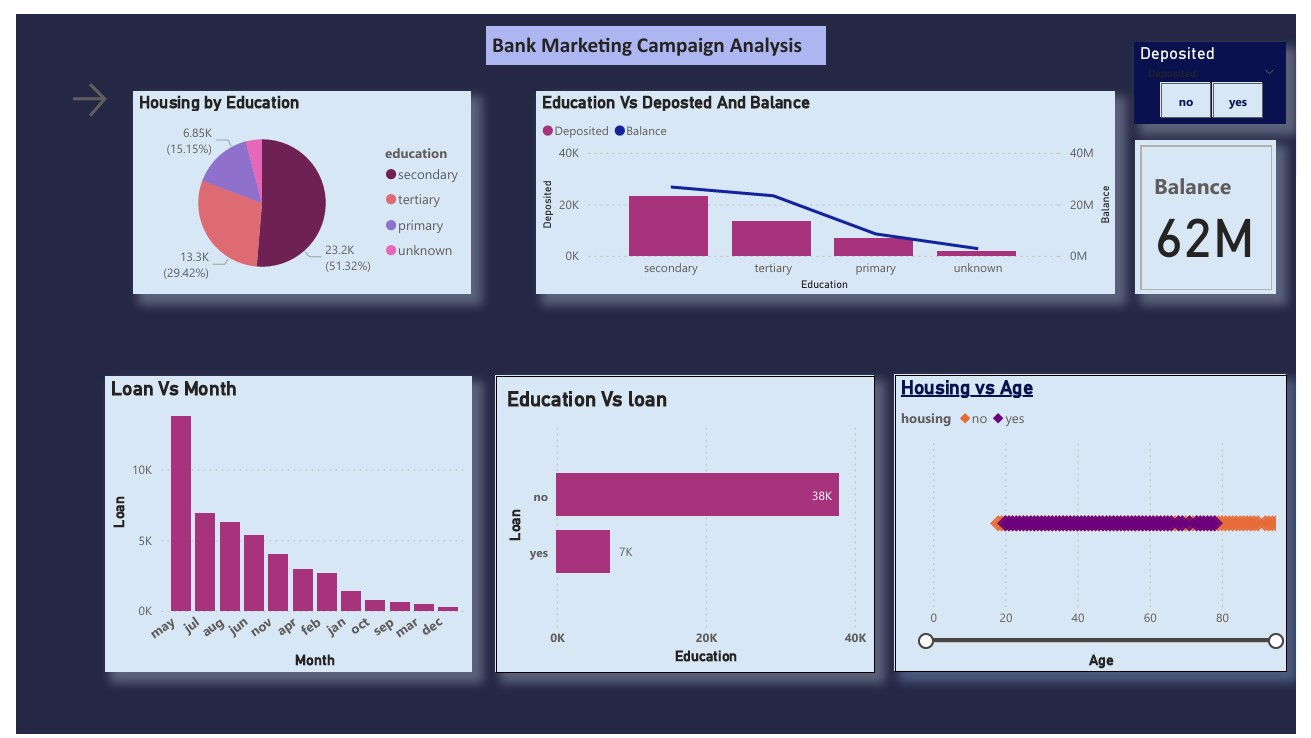

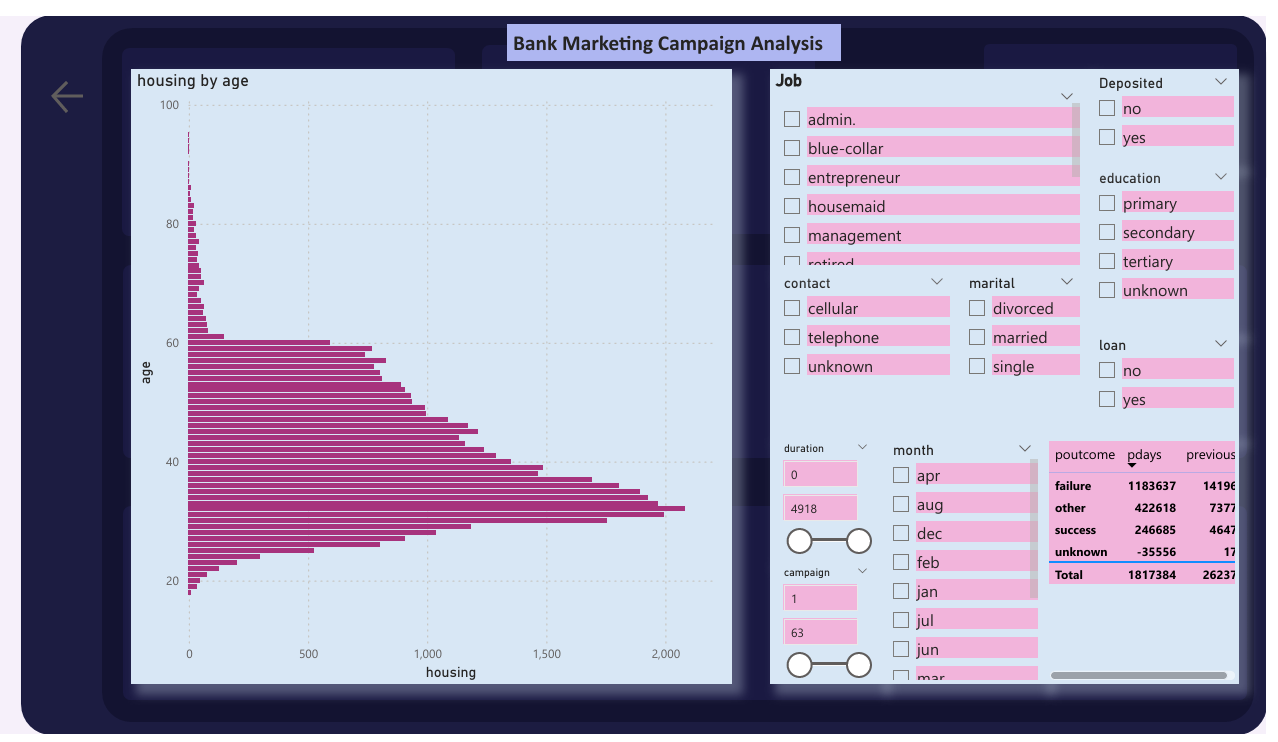

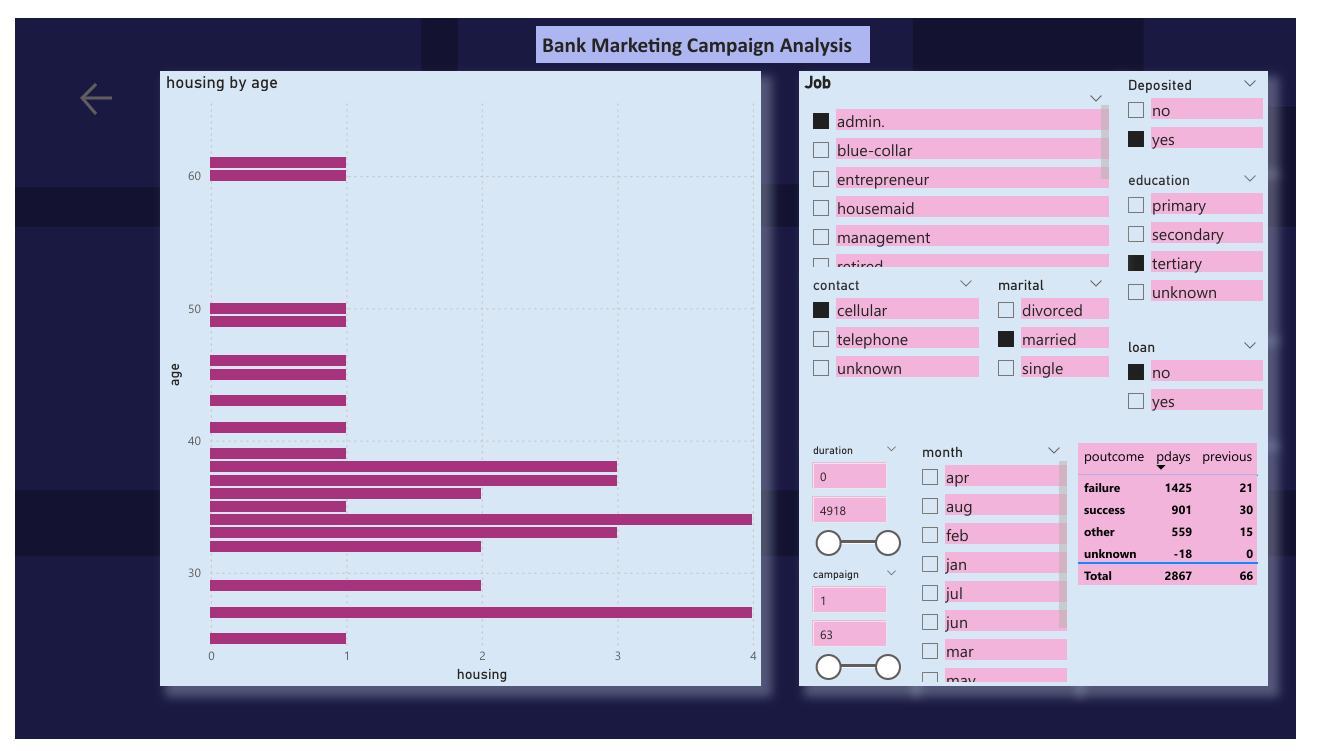

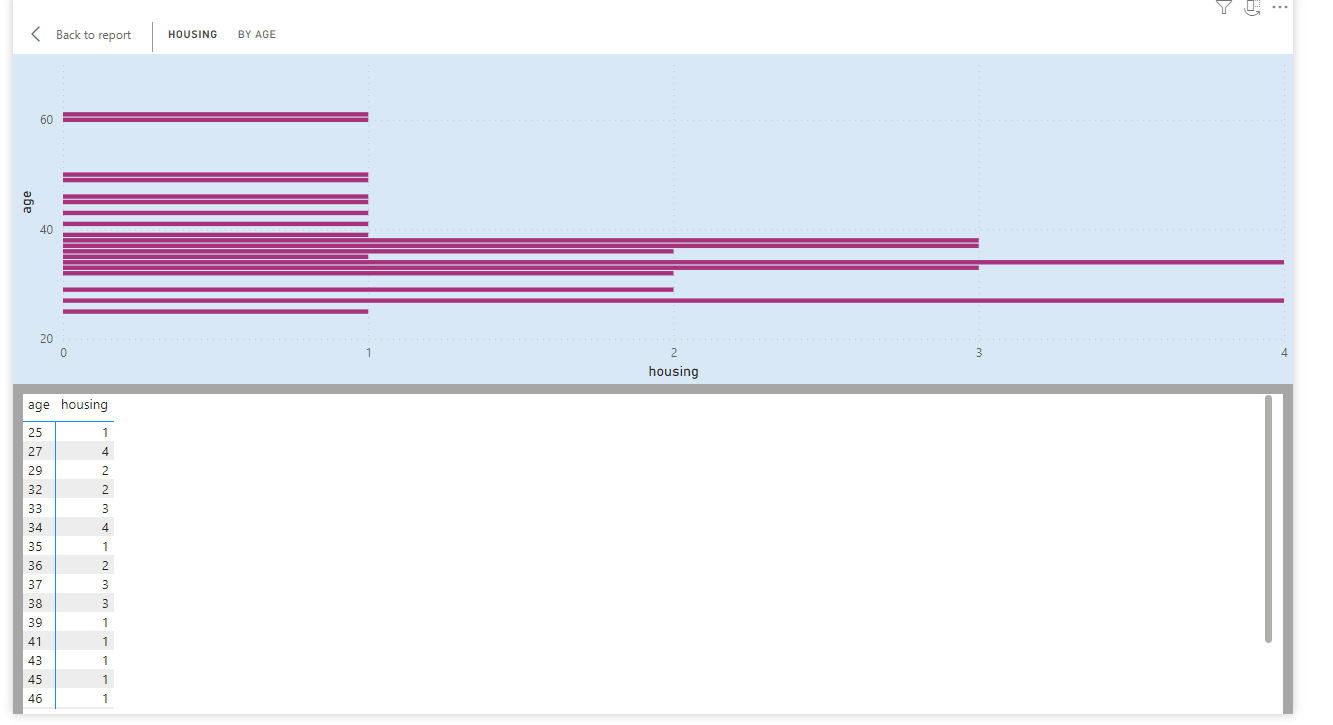

# Data Cleaning

# Handle Duplicates

# Remove duplicates


In [10]:
Bank_data = Bank_data.drop_duplicates()
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Handle missing values

In [ ]:

print(Bank_data.isnull().sum())

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Exploratory Data Analysis (EDA)

In [ ]:

import pandas as pd


Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [13]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [14]:
new_bank_data = Bank_data.sort_values(by='balance', ascending=True)

In [ ]:
#Outlier Detection and Handling:
#Identify and removing outliers in the 'balance' column:
Q1 = new_bank_data['balance'].quantile(0.25)
Q3 = new_bank_data['balance'].quantile(0.75)
IQR= Q3-Q1

print(Q1)
print(Q3)
print(IQR)

72.0
1428.0
1356.0


In [16]:
Bank_data1=Bank_data[ ~((Bank_data['balance']<(Q1-1.5*IQR))|(Bank_data['balance']>(Q3+1.5*IQR)))] 
print(Bank_data1)

       sl. no  age           job   marital  education default  balance  \
0           1   58    management   married   tertiary      no     2143   
1           2   44    technician    single  secondary      no       29   
2           3   33  entrepreneur   married  secondary      no        2   
3           4   47   blue-collar   married    unknown      no     1506   
4           5   33       unknown    single    unknown      no        1   
...       ...  ...           ...       ...        ...     ...      ...   
45205   45206   25    technician    single  secondary      no      505   
45206   45207   51    technician   married   tertiary      no      825   
45207   45208   71       retired  divorced    primary      no     1729   
45209   45210   57   blue-collar   married  secondary      no      668   
45210   45211   37  entrepreneur   married  secondary      no     2971   

      housing loan    contact  day month  duration  campaign  pdays  previous  \
0         yes   no    unknown 

(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

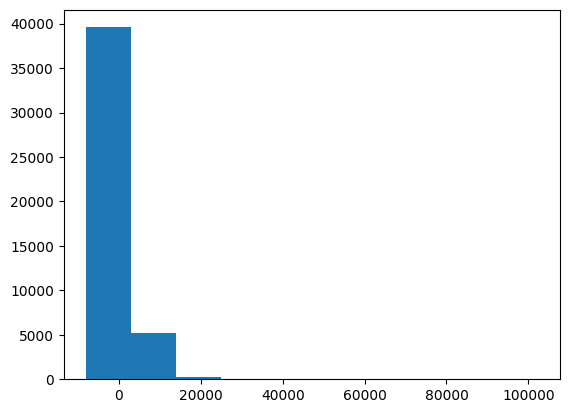

In [17]:
# Histogram
import matplotlib.pyplot as plt
plt.hist(new_bank_data['balance'])

In [ ]:

import pandas as pd


Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [19]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [ ]:
#Handling Missing Data: Removing columns that have more than 50% missing values: 
Bank_data.dropna(axis=1,thresh=0.5)

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [21]:
import pandas as pd
Bank_data4 = Bank_data['balance'].interpolate()
print(Bank_data4)

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64


In [22]:
import pandas as pd
Bank_data5=Bank_data4['balance'] = Bank_data['balance'].interpolate(method='linear')
print(Bank_data5)

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64


(array([3.9587e+04, 5.2330e+03, 2.9400e+02, 5.8000e+01, 2.1000e+01,
        7.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([ -8019. ,   2995.6,  14010.2,  25024.8,  36039.4,  47054. ,
         58068.6,  69083.2,  80097.8,  91112.4, 102127. ]),
 <BarContainer object of 10 artists>)

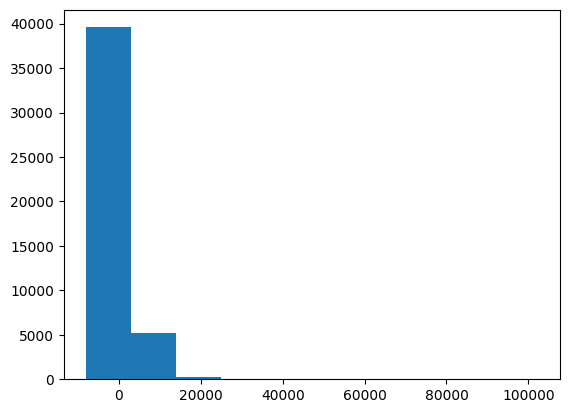

In [23]:
# Histogram
import matplotlib.pyplot as plt
plt.hist(Bank_data['balance'])

In [ ]:

import pandas as pd


Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [25]:
Bank_data.isna().sum()

sl. no       0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [26]:
Bank_data.columns

Index(['sl. no', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

In [27]:
Bank_data.values

array([[1, 58, 'management', ..., 0, 'unknown', 'no'],
       [2, 44, 'technician', ..., 0, 'unknown', 'no'],
       [3, 33, 'entrepreneur', ..., 0, 'unknown', 'no'],
       ...,
       [45209, 72, 'retired', ..., 3, 'success', 'yes'],
       [45210, 57, 'blue-collar', ..., 0, 'unknown', 'no'],
       [45211, 37, 'entrepreneur', ..., 11, 'other', 'no']], dtype=object)

In [28]:
Bank_data.dtypes

sl. no        int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [29]:
Bank_data.describe()

,sl. no,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,22606.000000,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,22606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [30]:
Bank_data.nunique()

sl. no       45211
age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
y                2
dtype: int64

array([[<Axes: title={'center': 'sl. no'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>, <Axes: >]], dtype=object)

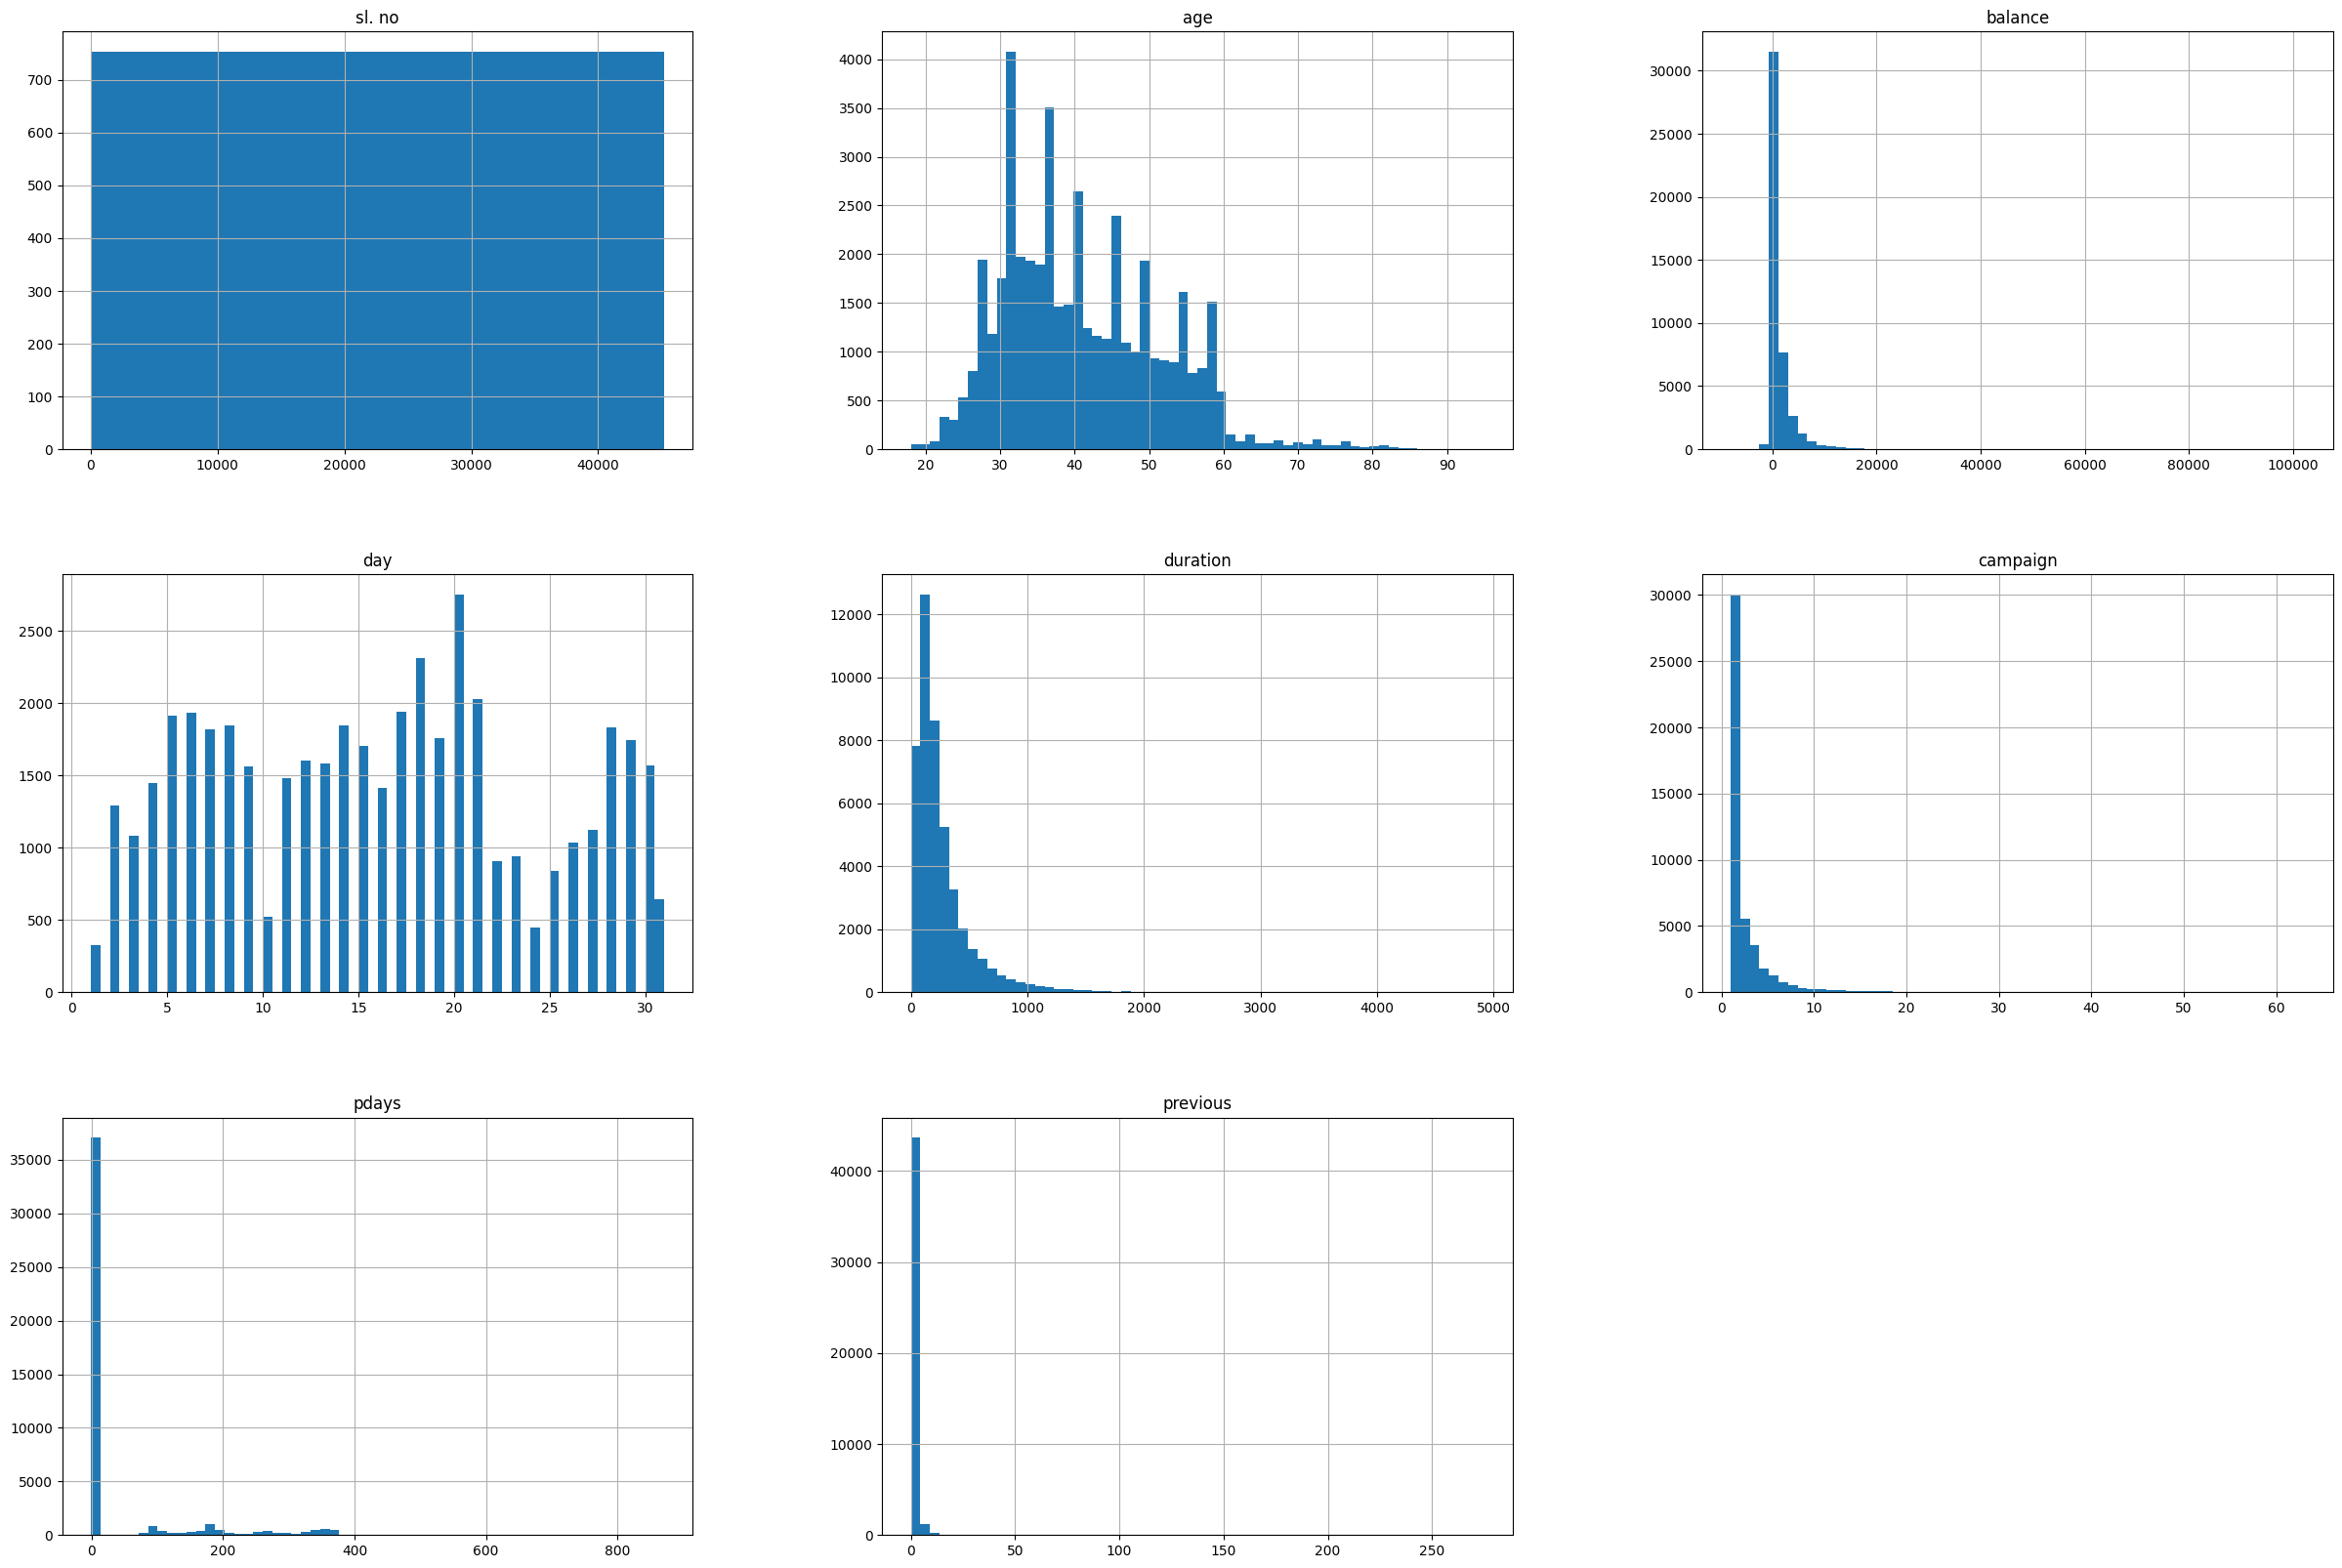

In [31]:
Bank_data.hist(bins=60, figsize=(30,20))

In [32]:
prev_zeroac = Bank_data[Bank_data['previous'] == 0]

In [33]:
prev_zeroac['poutcome'].unique()

array(['unknown'], dtype=object)

In [34]:
prev_oneac = Bank_data[Bank_data['previous'] > 0]

In [35]:
prev_oneac['poutcome'].unique()

array(['failure', 'other', 'success', 'unknown'], dtype=object)

In [36]:

Bank_Datafr = Bank_data.loc[(Bank_data['housing'] == 'no') & (Bank_data['loan'] == 'no') & (Bank_data['contact'] == 'telephone')]

In [37]:
Bank_Datafr

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
12660,12661,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no
12665,12666,25,blue-collar,single,secondary,no,192,no,no,telephone,4,jul,112,2,-1,0,unknown,no
12674,12675,36,unemployed,divorced,primary,no,0,no,no,telephone,4,jul,304,3,-1,0,unknown,no
12716,12717,49,technician,married,primary,no,486,no,no,telephone,7,jul,229,5,-1,0,unknown,no
12750,12751,46,unknown,married,unknown,no,2911,no,no,telephone,7,jul,41,9,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45141,45142,77,unknown,married,unknown,no,397,no,no,telephone,8,nov,207,1,185,3,success,no
45154,45155,63,retired,married,primary,no,3738,no,no,telephone,9,nov,301,1,456,4,failure,no
45166,45167,41,unemployed,single,tertiary,no,79,no,no,telephone,9,nov,394,1,390,2,success,yes
45170,45171,19,student,single,primary,no,245,no,no,telephone,10,nov,98,2,110,2,other,no


In [38]:
Bank_Datafr['default'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:

import pandas as pd


Bank_data=pd.read_csv("/kaggle/input/bank-full-version1/bank-full.csv")

In [40]:
Bank_data

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


,count
job,
blue-collar,9732
management,9458
technician,7597
admin.,5171
services,4154
retired,2264
self-employed,1579
entrepreneur,1487
unemployed,1303


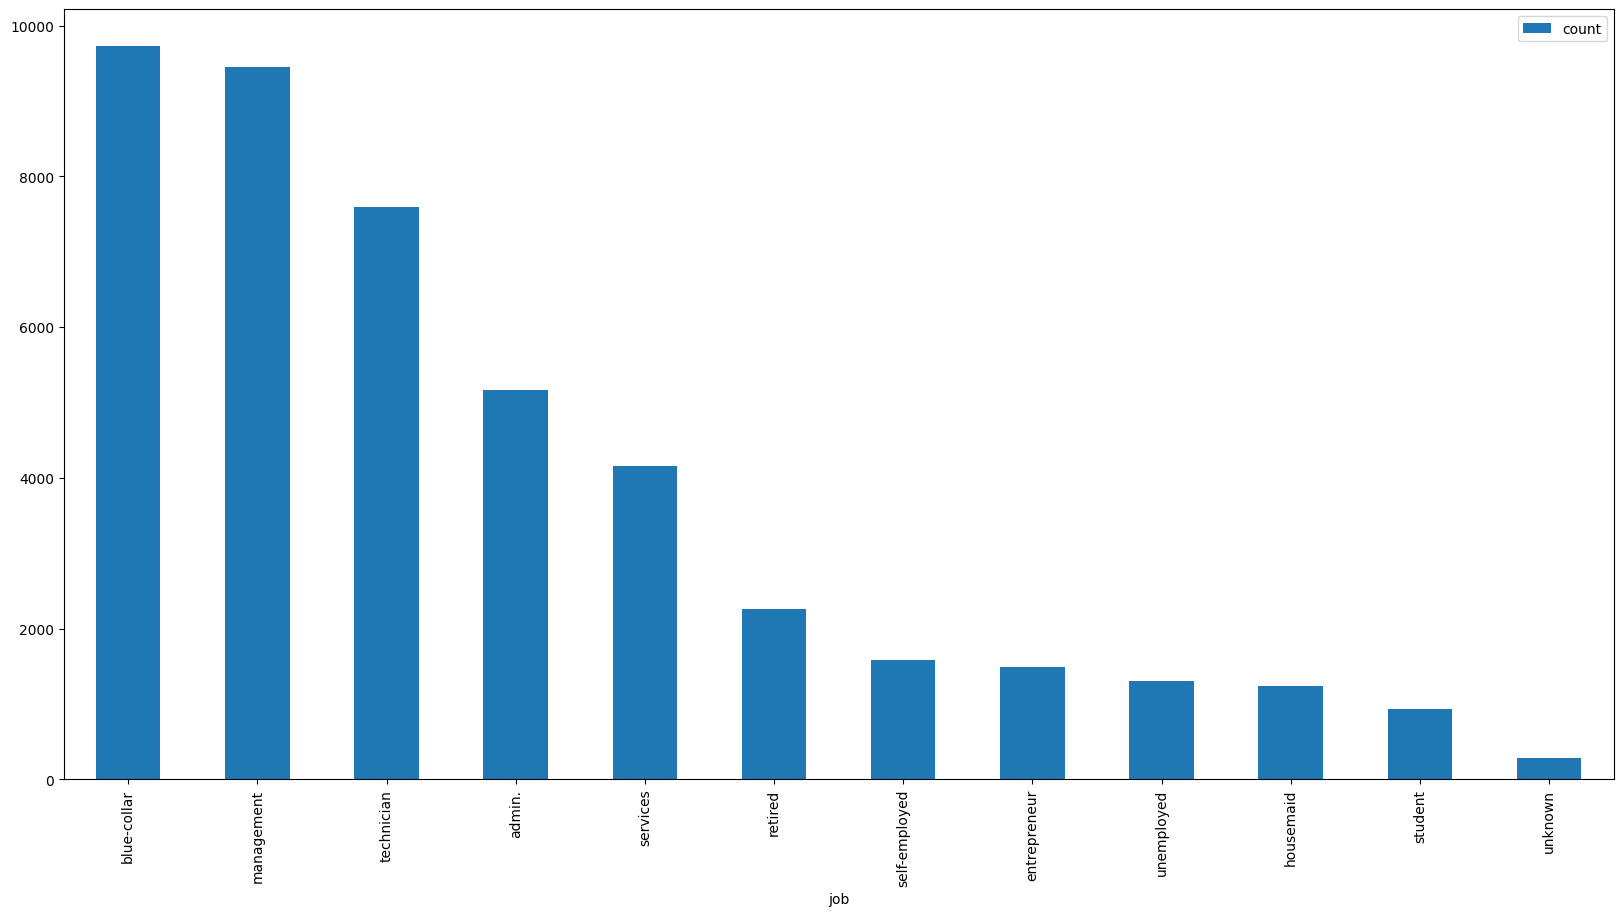

In [41]:
pd.DataFrame(Bank_data['job'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(Bank_data['job'].value_counts())

,count
marital,
married,27214
single,12790
divorced,5207


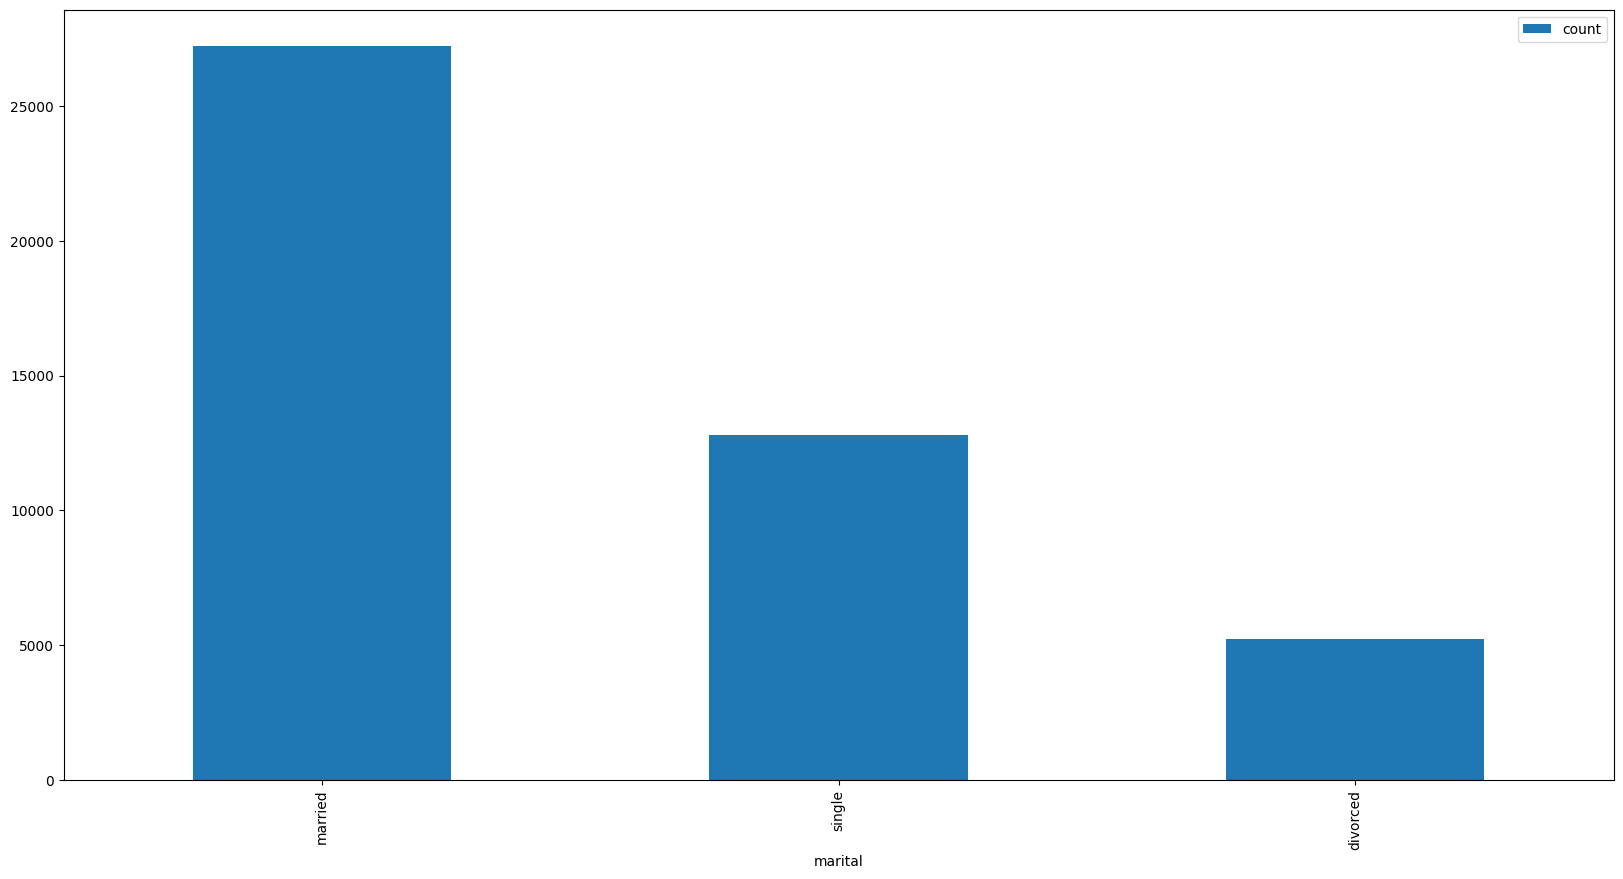

In [42]:
pd.DataFrame(Bank_data['marital'].value_counts()).plot(kind='bar', figsize=(20,10))
pd.DataFrame(Bank_data['marital'].value_counts())

In [43]:
newdataframe = Bank_data

In [44]:
newdataframe['default'] = newdataframe['default'].replace('unknown', np.nan)


In [45]:
newdataframe['loan'] = newdataframe['loan'].replace('unknown', np.nan)

In [46]:
newdataframe['housing'] = newdataframe['housing'].replace('unknown', np.nan)

In [47]:
newdataframe['education'] = newdataframe['education'].replace('unknown', np.nan)

In [48]:
newdataframe['job'] = newdataframe['job'].replace('unknown', np.nan)

In [49]:
newdataframe['marital'] = newdataframe['marital'].replace('unknown', np.nan)

In [50]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


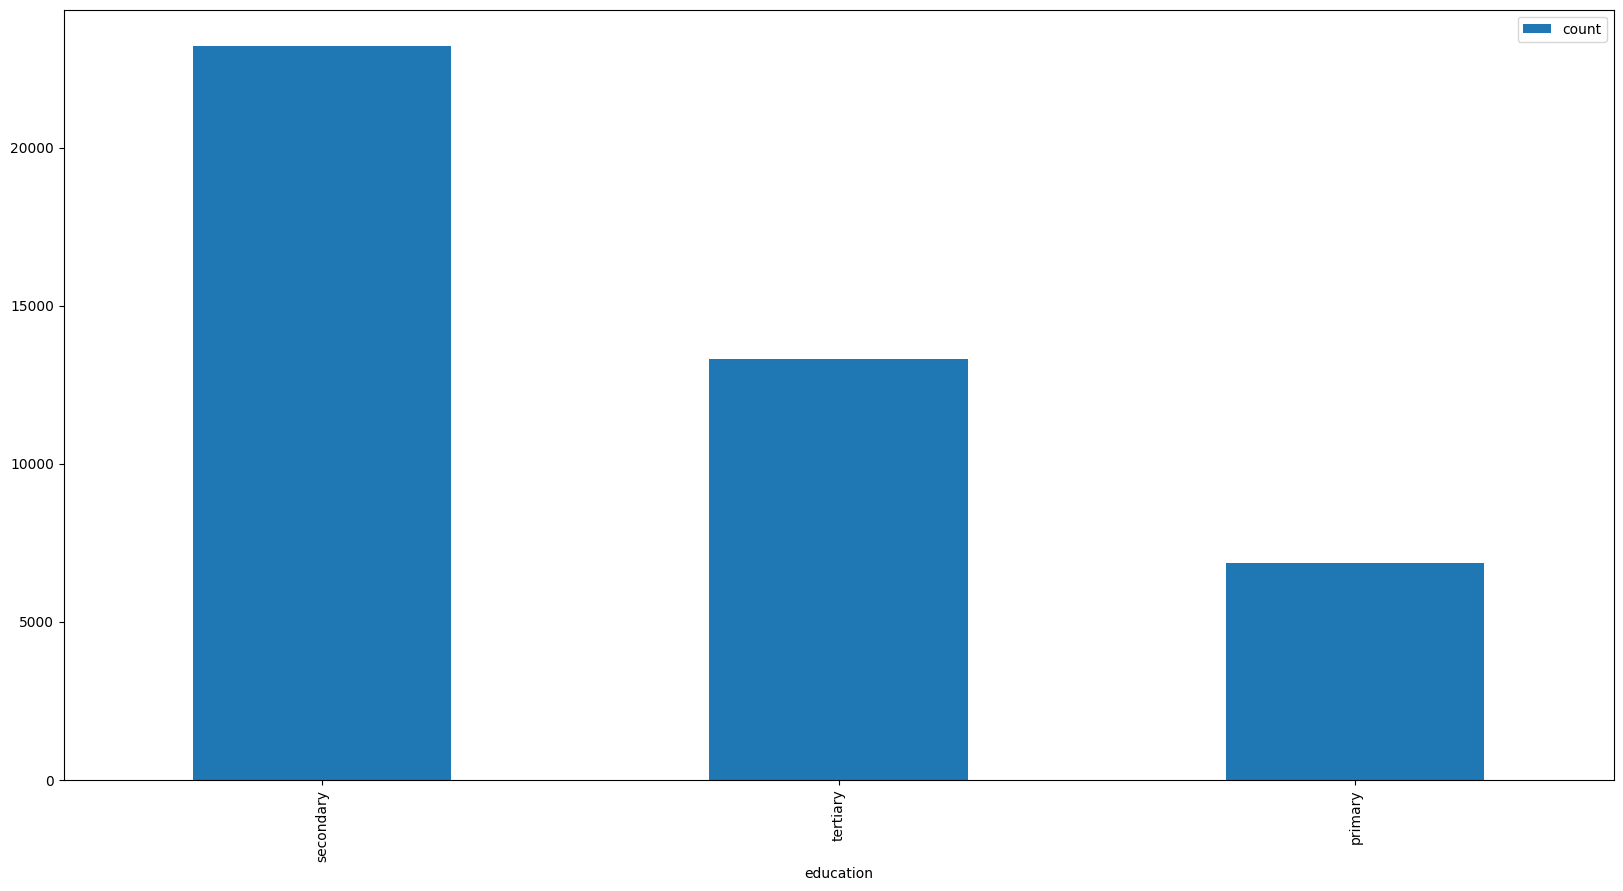

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


pd.DataFrame(newdataframe['education'].value_counts()).plot(kind='bar', figsize=(20, 10))


plt.show()


In [52]:
newdataframe.isna().sum()

sl. no          0
age             0
job           288
marital         0
education    1857
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
y               0
dtype: int64

In [53]:
newdataframe1 = newdataframe.sort_values(by='age', ascending=True)

In [54]:
newdataframe1

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
42954,42955,18,student,single,NaN,no,108,no,no,cellular,9,feb,92,1,183,1,success,yes
41273,41274,18,student,single,NaN,no,3,no,no,cellular,25,aug,130,2,-1,0,unknown,yes
42146,42147,18,student,single,secondary,no,156,no,no,cellular,4,nov,298,2,82,4,other,no
43637,43638,18,student,single,NaN,no,348,no,no,cellular,5,may,443,4,-1,0,unknown,yes
40736,40737,18,student,single,primary,no,1944,no,no,telephone,10,aug,122,3,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44420,44421,93,retired,married,NaN,no,775,no,no,cellular,4,aug,476,2,13,9,success,yes
44262,44263,93,retired,married,NaN,no,775,no,no,cellular,22,jul,860,2,177,7,success,yes
31233,31234,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,212,1,-1,0,unknown,no
41663,41664,95,retired,married,secondary,no,0,no,no,telephone,1,oct,215,1,-1,0,unknown,no


In [55]:
newdataframe['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [56]:
data_marital = pd.DataFrame()

data_marital['student'] = newdataframe[newdataframe['job'] == 'student']['marital'].value_counts()
data_marital['blue-collar'] = newdataframe[newdataframe['job'] == 'blue-collar']['marital'].value_counts()
data_marital['admin.'] = newdataframe[newdataframe['job'] == 'admin.']['marital'].value_counts()
data_marital['services'] = newdataframe[newdataframe['job'] == 'services']['marital'].value_counts()
data_marital['unemployed'] = newdataframe[newdataframe['job'] == 'unemployed']['marital'].value_counts()
data_marital['technician'] = newdataframe[newdataframe['job'] == 'technician']['marital'].value_counts()
data_marital['retired'] = newdataframe[newdataframe['job'] == 'retired']['marital'].value_counts()
data_marital['management'] = newdataframe[newdataframe['job'] == 'management']['marital'].value_counts()
data_marital['entrepreneur'] = newdataframe[newdataframe['job'] == 'entrepreneur']['marital'].value_counts()
data_marital['self-employed'] = newdataframe[newdataframe['job'] == 'self-employed']['marital'].value_counts()
data_marital['housemaid'] = newdataframe[newdataframe['job'] == 'housemaid']['marital'].value_counts()
data_marital['retired'] = newdataframe[newdataframe['job'] == 'retired']['marital'].value_counts()
data_marital['nan'] = newdataframe[newdataframe['job'] == 'nan']['marital'].value_counts()

In [57]:
data_marital

,student,blue-collar,admin.,services,unemployed,technician,retired,management,entrepreneur,self-employed,housemaid,nan
marital,,,,,,,,,,,,
single,878,2014,1728,1198,401,2620,108,2947,238,446,144,NaN
married,54,6968,2693,2407,731,4052,1731,5400,1070,993,912,NaN
divorced,6,750,750,549,171,925,425,1111,179,140,184,NaN


In [58]:
newdataframe['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [59]:
import pandas as pd


agetomarital = pd.DataFrame()
agetomarital['married'] = newdataframe[newdataframe['marital'] == 'married']['age'].value_counts()
agetomarital['single'] = newdataframe[newdataframe['marital'] == 'single']['age'].value_counts()
agetomarital['divorced'] = newdataframe[newdataframe['marital'] == 'divorced']['age'].value_counts()

print(agetomarital)


     married  single  divorced
age                           
34      1131   650.0     149.0
35      1077   631.0     186.0
36      1076   538.0     192.0
33      1075   746.0     151.0
37      1073   453.0     170.0
..       ...     ...       ...
89         2     NaN       1.0
92         2     NaN       NaN
93         2     NaN       NaN
88         2     NaN       NaN
95         1     NaN       1.0

[73 rows x 3 columns]


In [60]:
agetomarital.sort_index()

,married,single,divorced
age,,,
20,3,47.0,NaN
21,5,74.0,NaN
22,9,120.0,NaN
23,27,175.0,NaN
24,53,248.0,1.0
...,...,...,...
88,2,NaN,NaN
89,2,NaN,1.0
92,2,NaN,NaN


In [61]:
newdataframe['education'].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [62]:
import pandas as pd


agetoeducation = pd.DataFrame()
agetoeducation['tertiary'] = newdataframe[newdataframe['education'] == 'tertiary']['age'].value_counts()
agetoeducation['secondary'] = newdataframe[newdataframe['education'] == 'secondary']['age'].value_counts()
agetoeducation['unknown'] = newdataframe[newdataframe['education'] == 'unknown']['age'].value_counts()
agetoeducation['primary'] = newdataframe[newdataframe['education'] == 'primary']['age'].value_counts()

print(agetoeducation)

     tertiary  secondary  unknown  primary
age                                       
32        776     1088.0      NaN      179
33        760     1011.0      NaN      167
31        749     1065.0      NaN      139
34        718     1000.0      NaN      166
30        686      913.0      NaN      124
..        ...        ...      ...      ...
82          2        3.0      NaN       12
81          2        3.0      NaN       10
80          1       12.0      NaN       17
89          1        NaN      NaN        2
84          1        3.0      NaN        5

[65 rows x 4 columns]


In [63]:
agetoeducation.sort_index()

,tertiary,secondary,unknown,primary
age,,,,
20,3,26.0,NaN,6
21,6,54.0,NaN,10
22,14,96.0,NaN,8
23,33,143.0,NaN,17
24,44,219.0,NaN,19
...,...,...,...,...
81,2,3.0,NaN,10
82,2,3.0,NaN,12
83,5,2.0,NaN,14


In [64]:
print(data_marital.columns)


Index(['student', 'blue-collar', 'admin.', 'services', 'unemployed',
       'technician', 'retired', 'management', 'entrepreneur', 'self-employed',
       'housemaid', 'nan'],
      dtype='object')


<Axes: title={'center': 'Age VS Education'}, xlabel='age'>

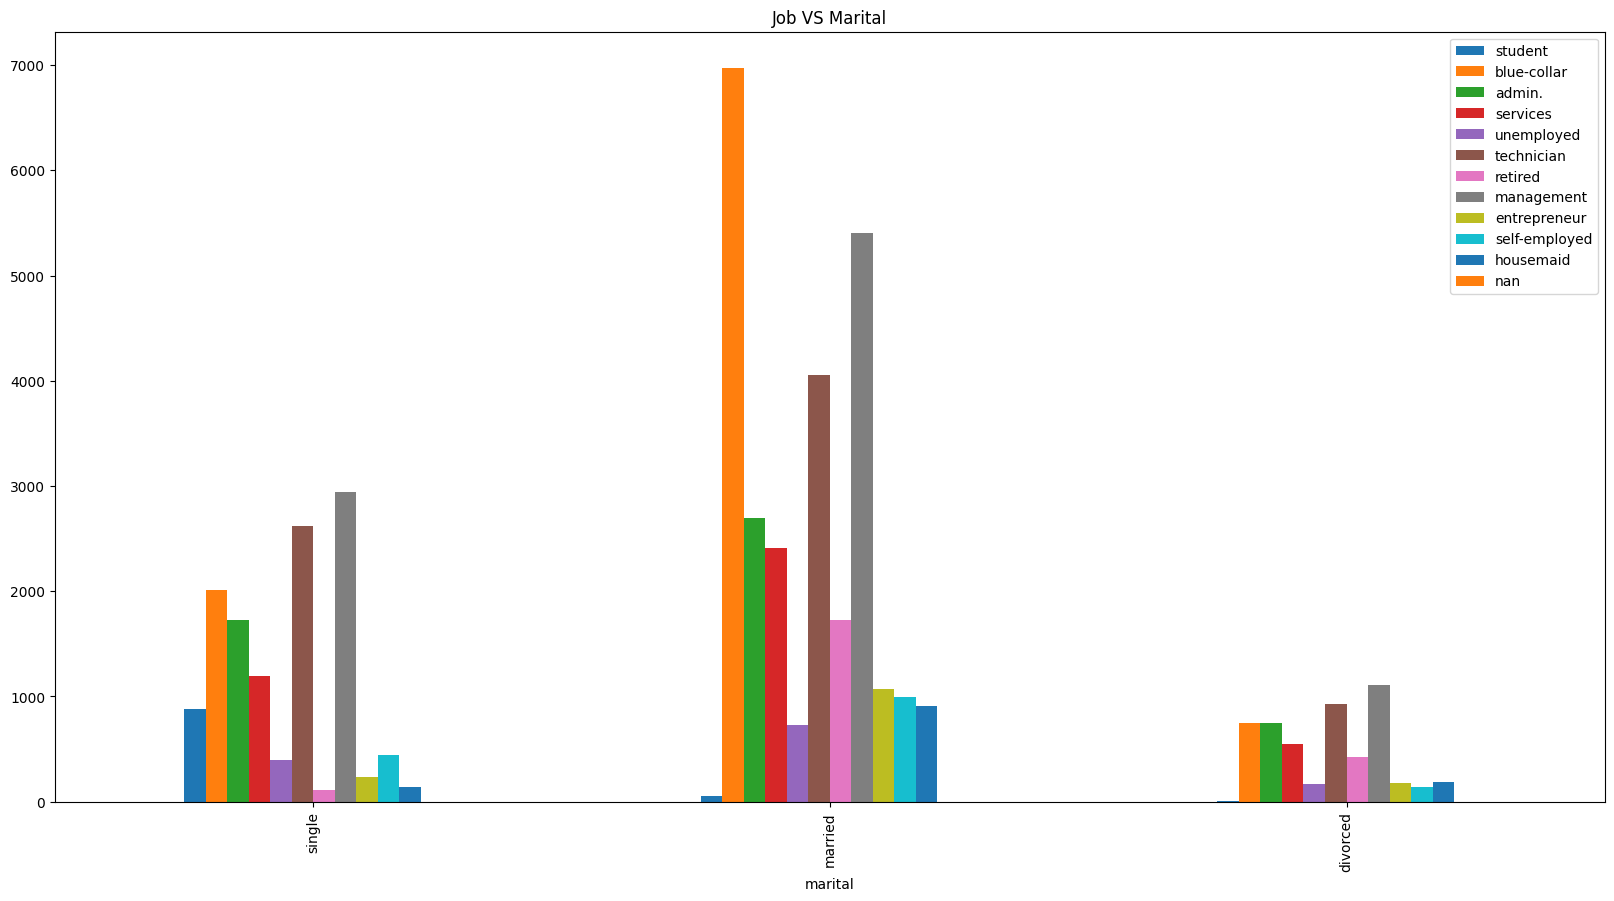

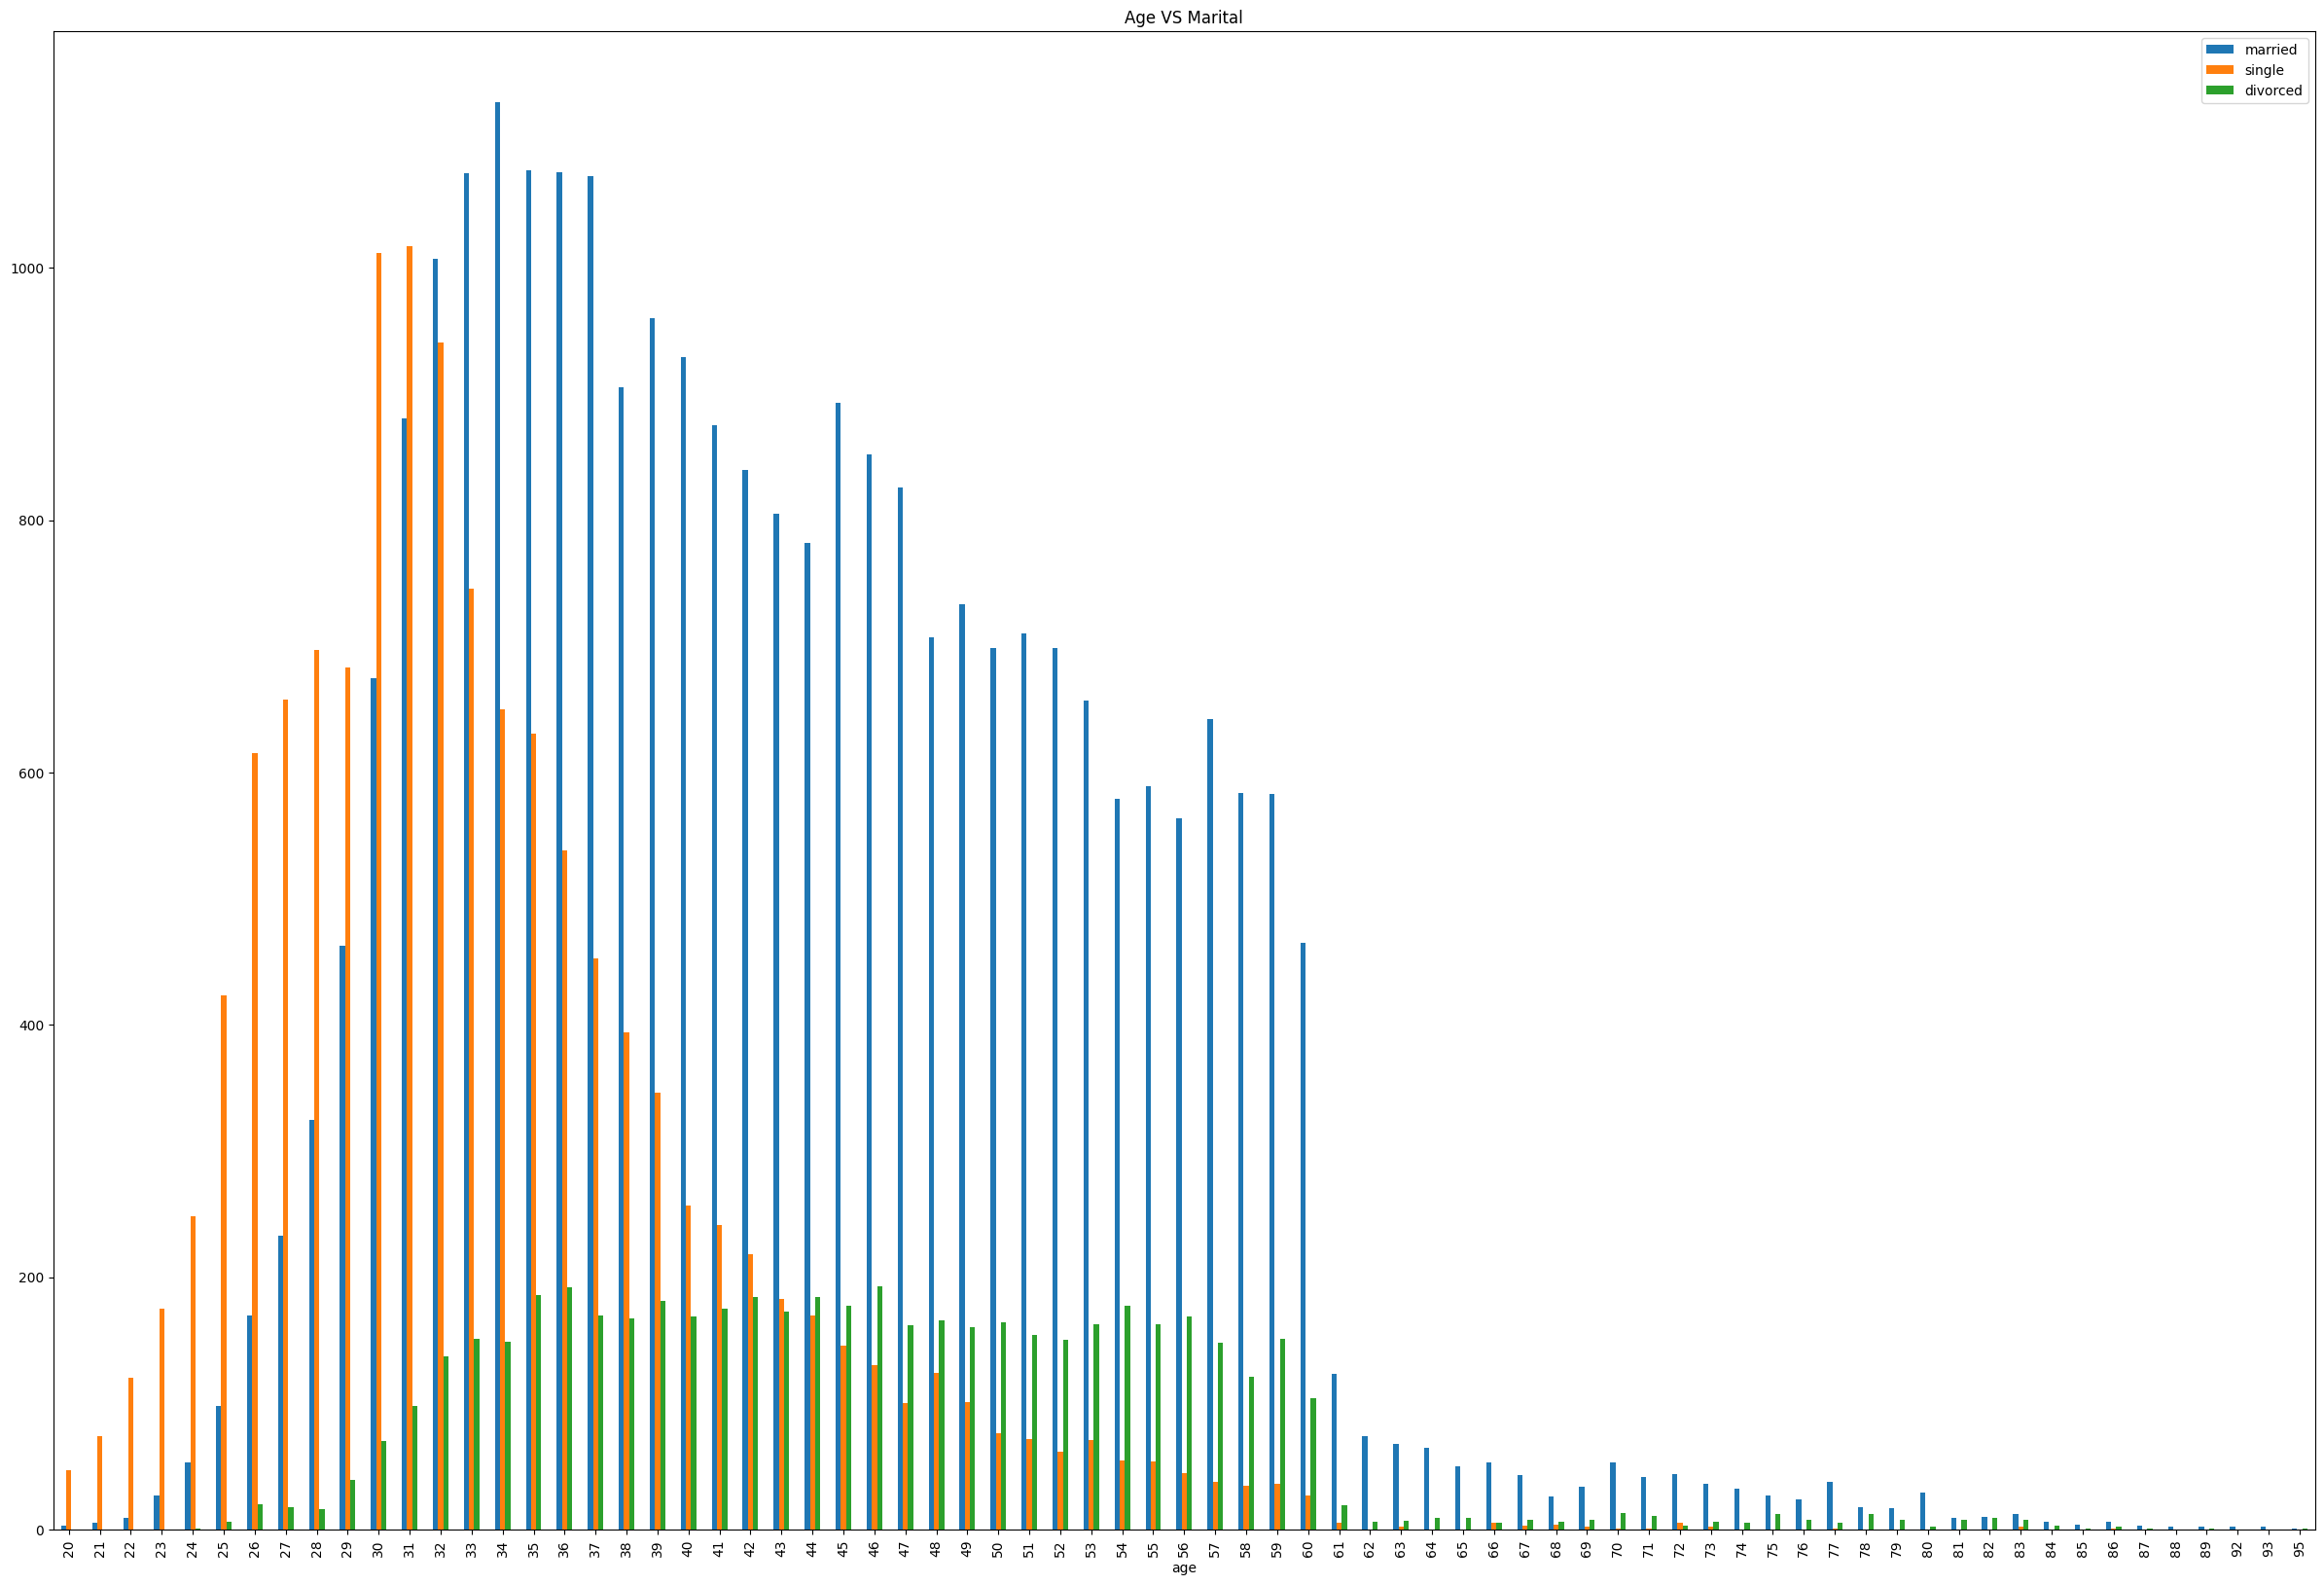

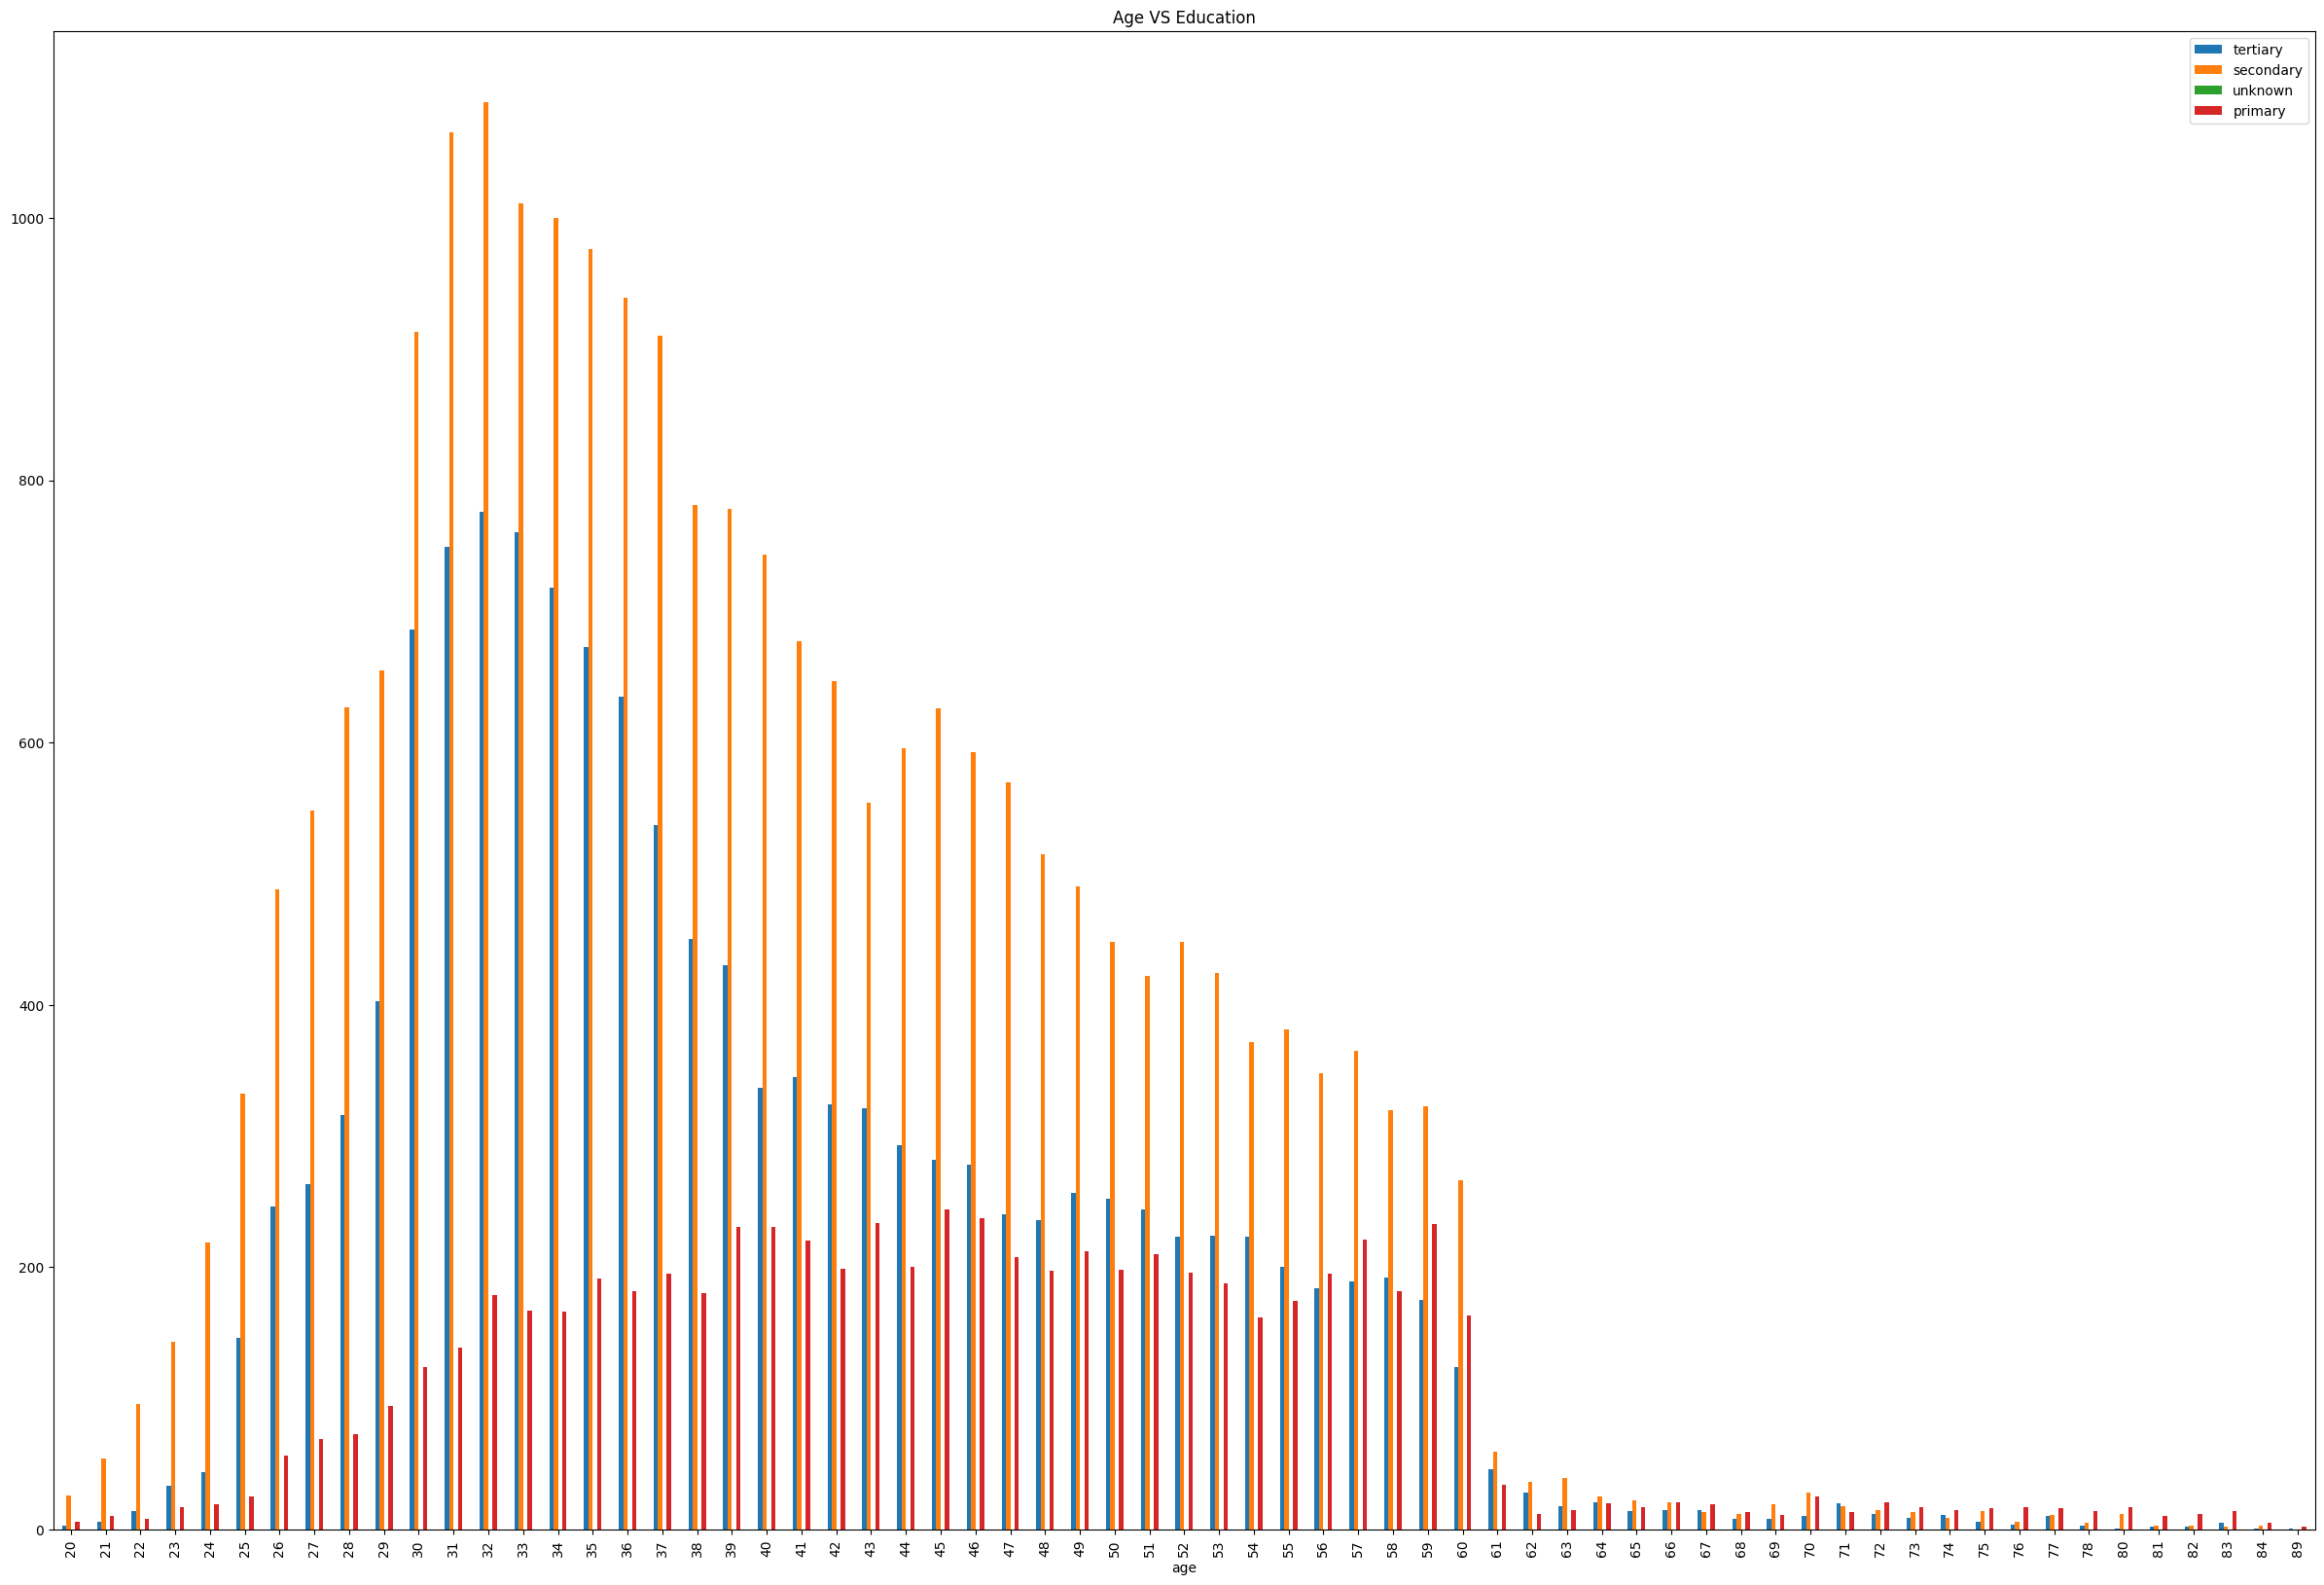

In [65]:
data_marital.plot.bar(title = "Job VS Marital", figsize=(20,10))
agetomarital.sort_index().plot.bar(title = 'Age VS Marital', figsize = (30,20))
agetoeducation.sort_index().plot.bar(title = 'Age VS Education', figsize = (30,20))

In [66]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [67]:
import pandas as pd


agetodeposit = pd.DataFrame()
agetodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['age'].value_counts()
agetodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['age'].value_counts()

print(agetodeposit)

     yes      no
age             
32   221  1864.0
30   217  1540.0
33   210  1762.0
35   209  1685.0
31   206  1790.0
..   ...     ...
87     3     1.0
90     2     NaN
92     2     NaN
93     2     NaN
95     1     1.0

[74 rows x 2 columns]


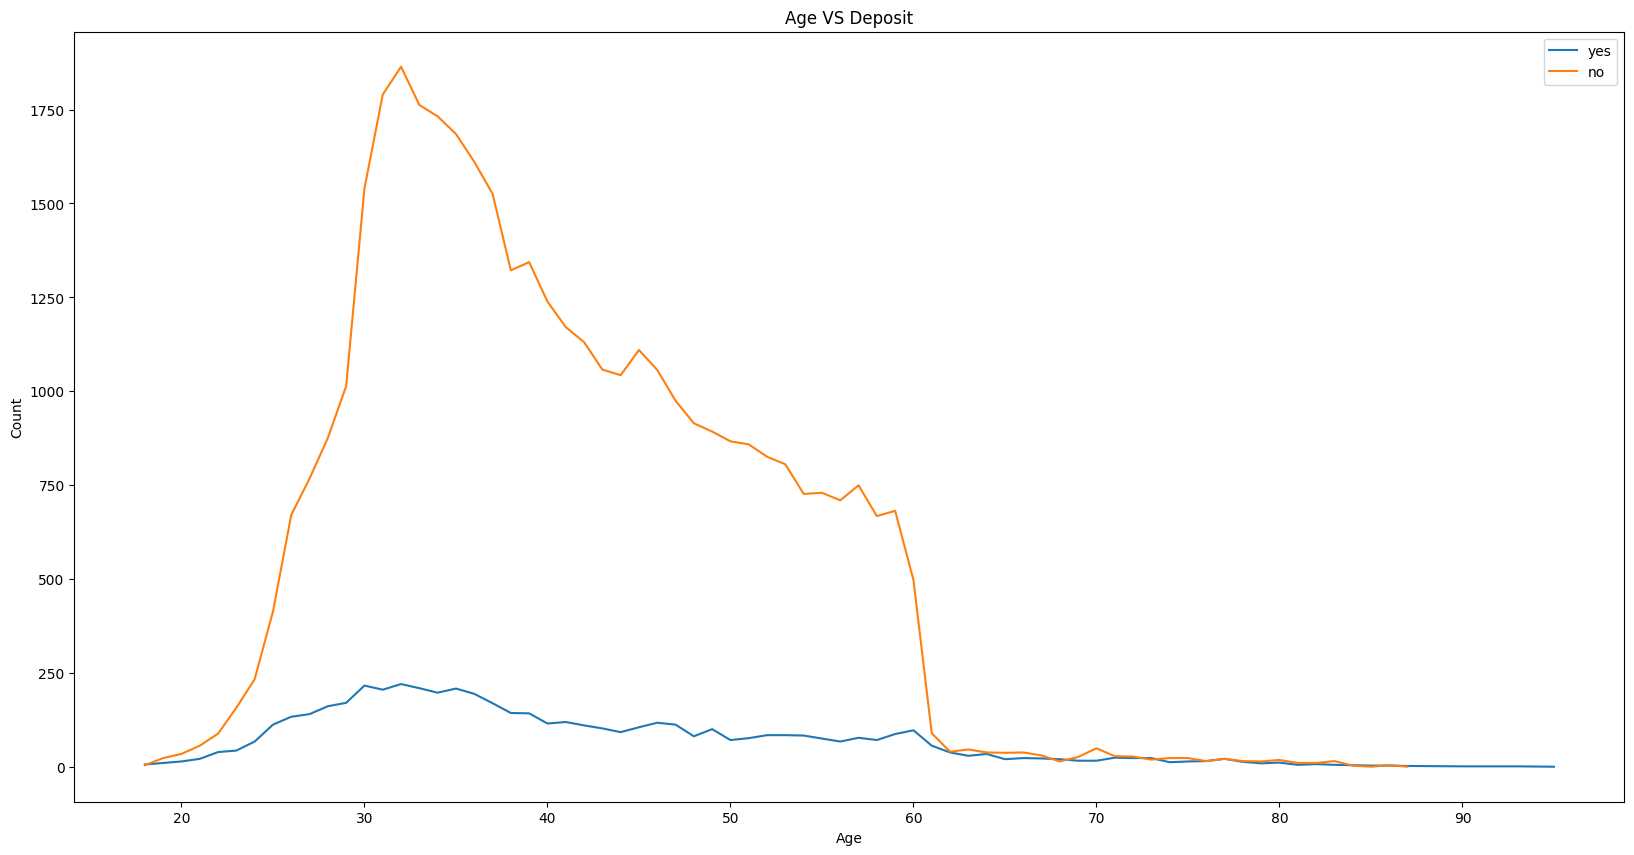

In [68]:
import pandas as pd
import matplotlib.pyplot as plt


agetodeposit = pd.DataFrame()
agetodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['age'].value_counts()
agetodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['age'].value_counts()

# Plotting the line plot
agetodeposit.sort_index().plot(kind='line', title="Age VS Deposit", figsize=(20, 10))
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<Axes: title={'center': 'Age VS Deposit'}, xlabel='age'>

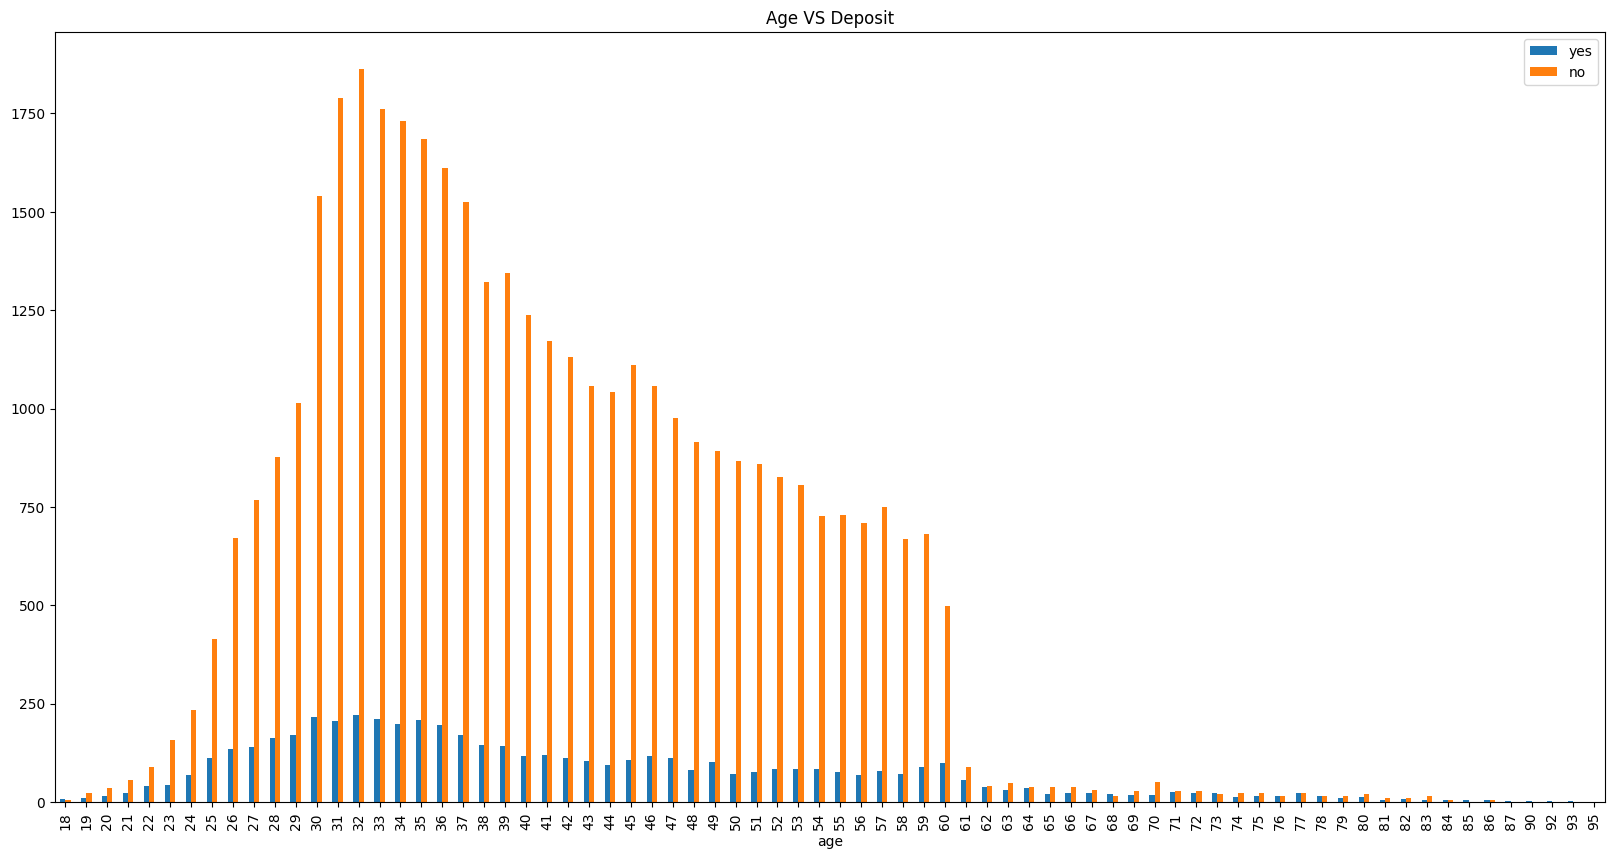

In [69]:
agetodeposit = pd.DataFrame()

agetodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['age'].value_counts()
agetodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['age'].value_counts()

agetodeposit.sort_index().plot.bar(title = "Age VS Deposit", figsize=(20,10))

<Axes: title={'center': 'Job VS Deposit'}, xlabel='job'>

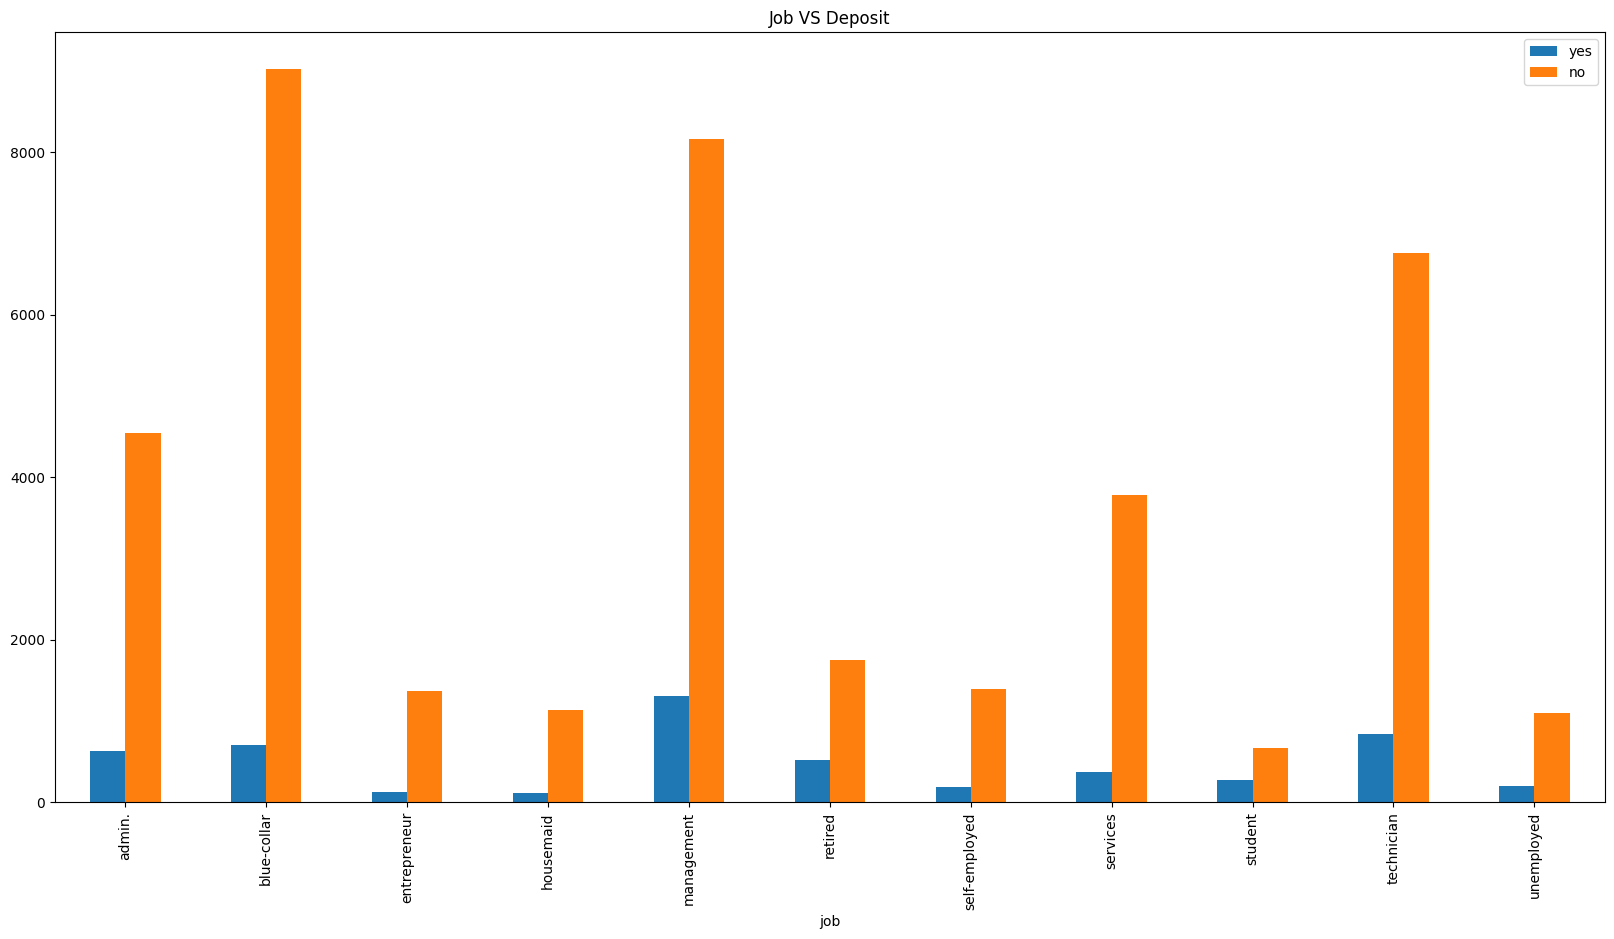

In [70]:
jobtodeposit = pd.DataFrame()

jobtodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['job'].value_counts()
jobtodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['job'].value_counts()

jobtodeposit.sort_index().plot.bar(title = "Job VS Deposit", figsize=(20,10))

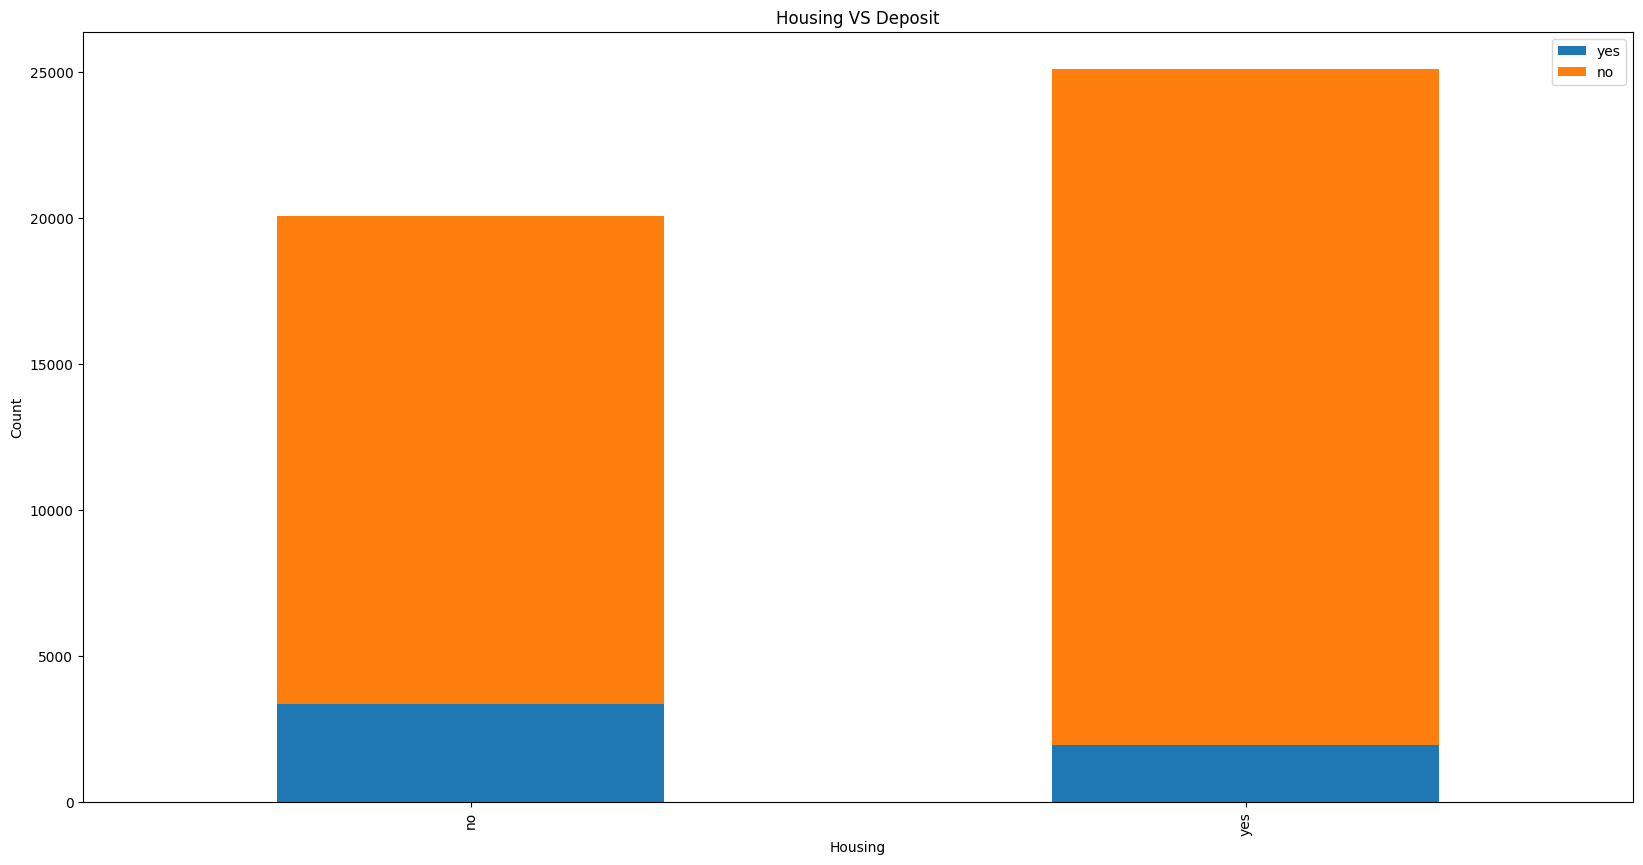

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


housingtodeposit = pd.DataFrame()
housingtodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['housing'].value_counts()
housingtodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['housing'].value_counts()


housingtodeposit.sort_index().plot(kind='bar', stacked=True, title="Housing VS Deposit", figsize=(20, 10))
plt.xlabel("Housing")
plt.ylabel("Count")
plt.show()


<Axes: title={'center': 'Housing VS Deposit'}, xlabel='housing'>

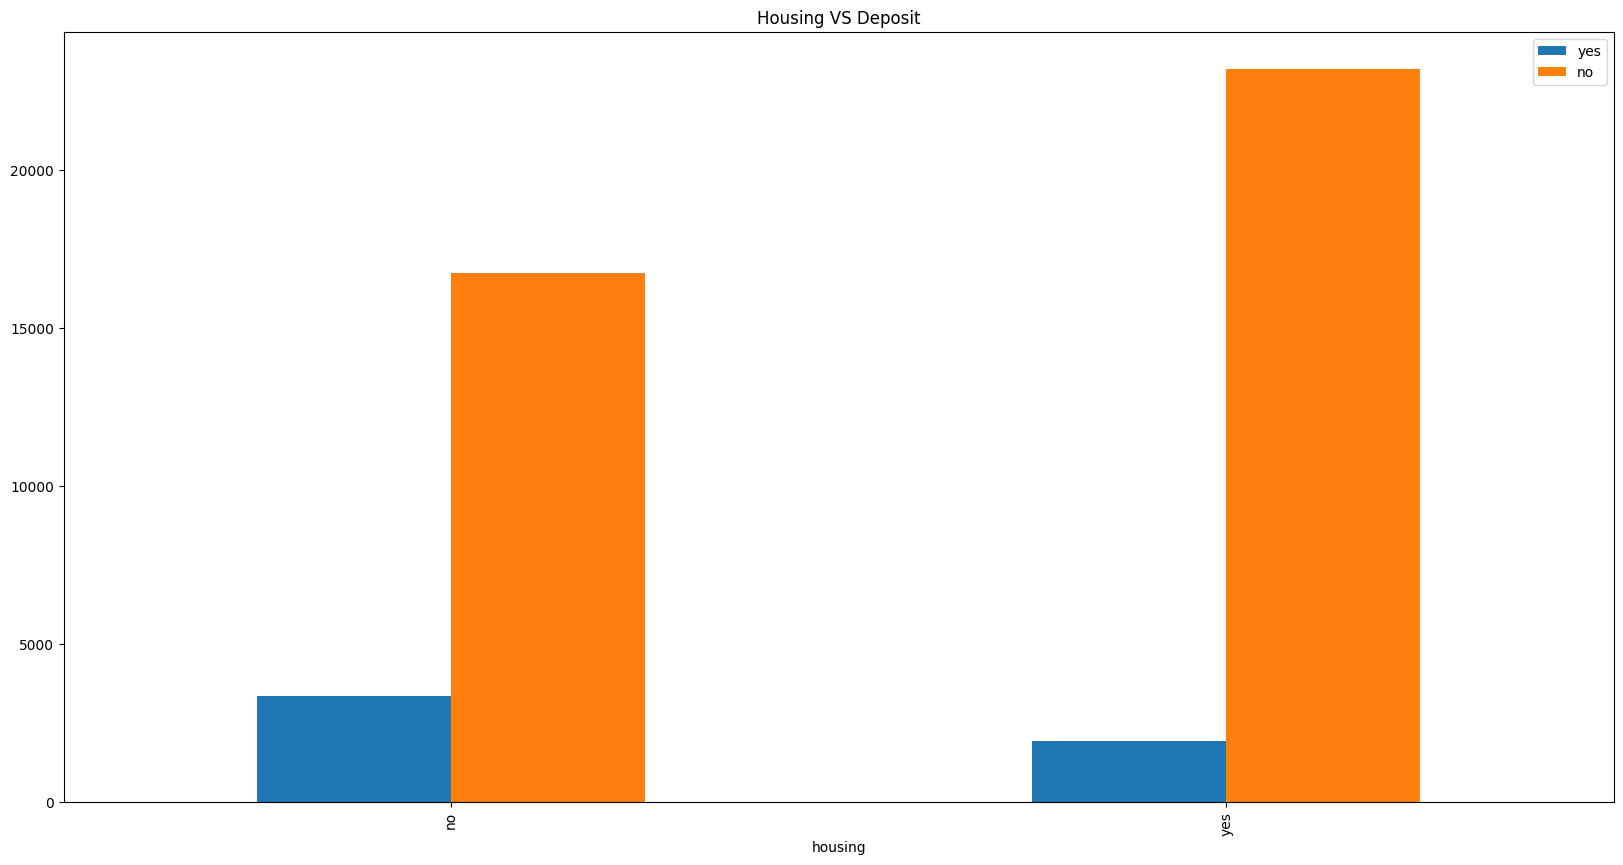

In [72]:
housingtodeposit = pd.DataFrame()

housingtodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['housing'].value_counts()
housingtodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['housing'].value_counts()

housingtodeposit.sort_index().plot.bar(title = "Housing VS Deposit", figsize=(20,10))

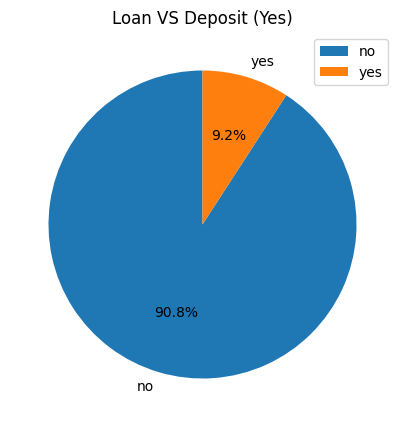

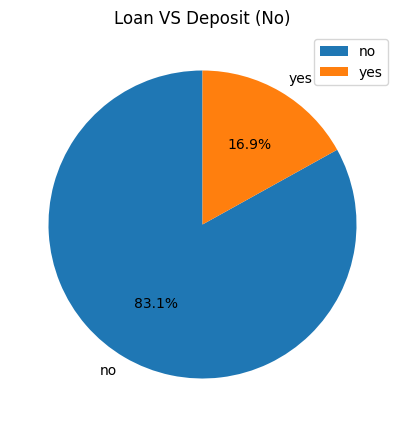

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


loantodeposit = pd.DataFrame()
loantodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['loan'].value_counts()
loantodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['loan'].value_counts()

plt.figure(figsize=(20, 10))


loantodeposit['yes'].plot.pie(autopct='%1.1f%%', startangle=90, title='Loan VS Deposit (Yes)', figsize=(10, 5), legend=True)
plt.ylabel('')  # Hide y-label
plt.show()

plt.figure(figsize=(20, 10))
loantodeposit['no'].plot.pie(autopct='%1.1f%%', startangle=90, title='Loan VS Deposit (No)', figsize=(10, 5), legend=True)
plt.ylabel('')  # Hide y-label
plt.show()


<Axes: title={'center': 'Loan VS Deposit'}, xlabel='loan'>

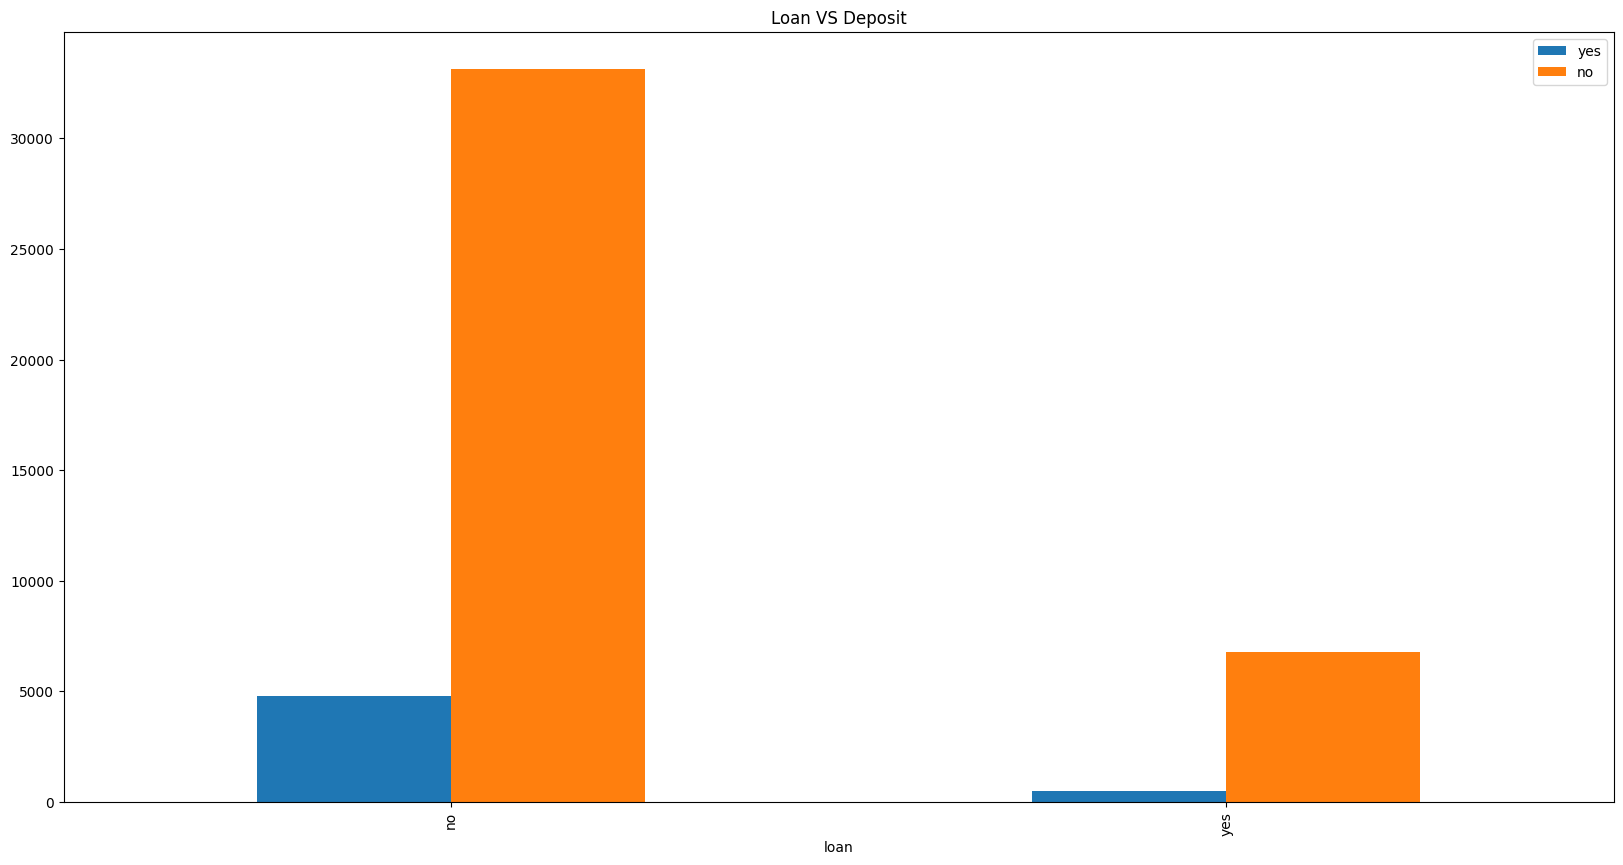

In [74]:
loantodeposit = pd.DataFrame()

loantodeposit['yes'] = newdataframe[newdataframe['y'] == 'yes']['loan'].value_counts()
loantodeposit['no'] = newdataframe[newdataframe['y'] == 'no']['loan'].value_counts()

loantodeposit.sort_index().plot.bar(title = "Loan VS Deposit", figsize=(20,10))

In [75]:
old_age = newdataframe[newdataframe['age'] > 61]

In [76]:
old_age

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28906,28907,66,housemaid,married,secondary,no,1929,no,no,cellular,2,feb,169,1,-1,0,unknown,no
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29158,29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,29262,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [77]:
old_age[old_age['y'] == 'yes']

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29464,29465,68,retired,divorced,primary,no,250,no,no,cellular,3,feb,360,1,-1,0,unknown,yes
29865,29866,75,retired,divorced,primary,no,3881,yes,no,cellular,4,feb,136,3,-1,0,unknown,yes
29961,29962,69,retired,married,primary,no,324,no,no,cellular,4,feb,136,4,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


In [78]:
old_age

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28906,28907,66,housemaid,married,secondary,no,1929,no,no,cellular,2,feb,169,1,-1,0,unknown,no
28924,28925,62,technician,married,secondary,no,973,no,no,cellular,2,feb,326,1,-1,0,unknown,yes
28965,28966,62,retired,married,secondary,no,1495,no,no,cellular,2,feb,265,1,-1,0,unknown,yes
29158,29159,83,retired,married,primary,no,425,no,no,telephone,2,feb,912,1,-1,0,unknown,no
29261,29262,75,retired,divorced,primary,no,46,no,no,cellular,2,feb,294,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45191,45192,75,retired,divorced,tertiary,no,3810,yes,no,cellular,16,nov,262,1,183,1,failure,yes
45195,45196,68,retired,married,secondary,no,1146,no,no,cellular,16,nov,212,1,187,6,success,yes
45204,45205,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes


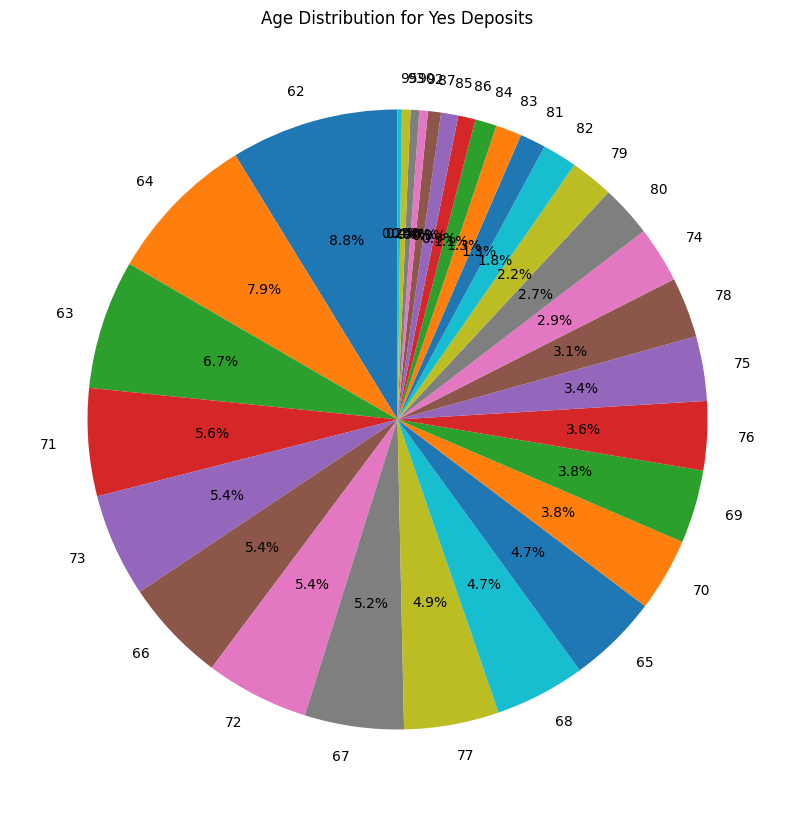

In [ ]:
import matplotlib.pyplot as plt

yes_old_age = old_age[old_age['y'] == 'yes']


yes_old_age['age'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(10, 20))
plt.title('Age Distribution for Yes Deposits')
plt.ylabel('')  
plt.show()


In [80]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,2,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,3,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,4,47,blue-collar,married,NaN,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,5,33,NaN,single,NaN,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,45208,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,45209,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,45210,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [81]:
newdataframe.rename(columns = {'y':'deposited?'}, inplace = True)

In [82]:
newdataframe['default'] = newdataframe['default'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_30/1659705627.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdataframe['default'] = newdataframe['default'].replace({'yes': 1, 'no': 0})


In [83]:
newdataframe['deposited?'] = newdataframe['deposited?'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_30/4240559750.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdataframe['deposited?'] = newdataframe['deposited?'].replace({'yes': 1, 'no': 0})


In [84]:
newdataframe['housing'] = newdataframe['housing'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_30/1307757760.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdataframe['housing'] = newdataframe['housing'].replace({'yes': 1, 'no': 0})


In [85]:
newdataframe['loan'] = newdataframe['loan'].replace({'yes': 1, 'no': 0})

/tmp/ipykernel_30/4165195534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  newdataframe['loan'] = newdataframe['loan'].replace({'yes': 1, 'no': 0})


In [86]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,4,47,blue-collar,married,NaN,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,5,33,NaN,single,NaN,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


In [87]:
newdataframe.dtypes

sl. no         int64
age            int64
job           object
marital       object
education     object
default        int64
balance        int64
housing        int64
loan           int64
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
deposited?     int64
dtype: object

In [88]:
newdataframe['default'] = newdataframe['default'].astype('Int64')

In [89]:
newdataframe['housing'] = newdataframe['housing'].astype('Int64')

In [90]:
newdataframe['loan'] = newdataframe['loan'].astype('Int64')

In [91]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,4,47,blue-collar,married,NaN,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,5,33,NaN,single,NaN,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0


<Axes: >

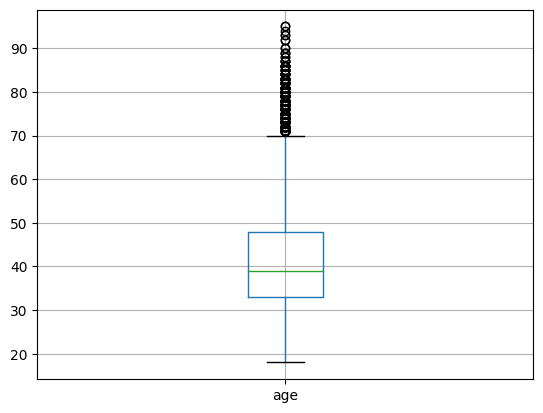

In [92]:
newdataframe.boxplot(column='age')

In [93]:
newdataframe.drop('duration', axis='columns', inplace = True)

In [94]:
newdataframe

,sl. no,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposited?
0,1,58,management,married,tertiary,0,2143,1,0,unknown,5,may,1,-1,0,unknown,0
1,2,44,technician,single,secondary,0,29,1,0,unknown,5,may,1,-1,0,unknown,0
2,3,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,1,-1,0,unknown,0
3,4,47,blue-collar,married,NaN,0,1506,1,0,unknown,5,may,1,-1,0,unknown,0
4,5,33,NaN,single,NaN,0,1,0,0,unknown,5,may,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,3,-1,0,unknown,1
45207,45208,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,2,-1,0,unknown,1
45208,45209,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,5,184,3,success,1
45209,45210,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,4,-1,0,unknown,0


In [95]:
newdataframe.isnull().sum()

sl. no           0
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
campaign         0
pdays            0
previous         0
poutcome         0
deposited?       0
dtype: int64

In [96]:
newdataframe.shape

(45211, 17)

In [97]:
newdataframe = newdataframe.fillna({'default': 0, 'housing': 0, 'loan': 0})


In [98]:
newdataframe.isnull().sum()

sl. no           0
age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact          0
day              0
month            0
campaign         0
pdays            0
previous         0
poutcome         0
deposited?       0
dtype: int64

In [99]:
newdataframe.dropna(inplace=True)

In [100]:

newdataframe.isnull().sum()

sl. no        0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
campaign      0
pdays         0
previous      0
poutcome      0
deposited?    0
dtype: int64

# Based on the analysis with the dataset for the Bank Marketing Campaign, several key business recommendations can be formulated to enhance the bank's marketing strategy for term purchases


# (i) It is strongly recommended that the bank could directs its marketing efforts towards married couples. The Analysis chart indicates that the married individuals have demonstrated a notably higher chances of purchasing in term deposits. 
# (ii) The target demographic have to be considered as primary focus for the bank's promotional activities. 
# (iii) The bank can consider tailoring its marketing Campaign towards tertiary graduated individuals.This demographic has shown a higher propensity for term purchases, suggesting that targeting this educated group may yield higher chances of conversions. 
# (iv) Individuals without outstanding loans should be a priority in the bank's marketing strategy. 
# (v)  The bank can concentrate its marketing endeavors on individuals in their late twenties to early forties.
# (vi) The bank can concentrate on the customers with housing availablity for their term deposit product promotion
# The demographic satisfying the classes can be identified to execute Bank Marketing Campaign as demonstrated in the above Exploratory Data Analysis.
